# Business Case: Walmart - Confidence Interval and CLT

# About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

# Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, kruskal
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import norm
from scipy.stats import ttest_1samp,  ttest_ind

from scipy.stats import pearsonr, spearmanr

from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("walmart_data.txt")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")


Number of rows: 550,068 
Number of columns: 10


# Checking for null values



In [ ]:
df.isna().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Checking the unique values in every column



In [ ]:
df.nunique().sort_values(ascending=False)


Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

# Checking for duplicates



In [ ]:
df.duplicated().sum()



0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
col = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
df[col] = df[col].astype('category')
df.dtypes


User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [ ]:
df.describe()


,Occupation,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000
mean,8.076707,5.404270,9263.968713
std,6.522660,3.936211,5023.065394
min,0.000000,1.000000,12.000000
25%,2.000000,1.000000,5823.000000
50%,7.000000,5.000000,8047.000000
75%,14.000000,8.000000,12054.000000
max,20.000000,20.000000,23961.000000


In [ ]:
df.describe(include=['object','category'])


,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,3,5,2
top,1001680,P00265242,M,26-35,B,1,0
freq,1026,1880,414259,219587,231173,193821,324731


- There are 5891 unique users. User ID 1001680 has shopped the most frequent from Walmart.

- There are 3631 unique products. Product ID P00265242 is the most frequent sold item.

- Men are more frequent buyers than Females.

- There are 7 unique age categories. The most frequent buyers fall under the age group of 26-35.

- There are 3 different city categories. Most frequent buyers fal under category B.

- Most people are in the current city since 1 year.

- Most customerd are unmarried.


# Univariate Analysis¶


In [ ]:
print(df['User_ID'].nunique())
print(df['Product_ID'].nunique())




5891
3631


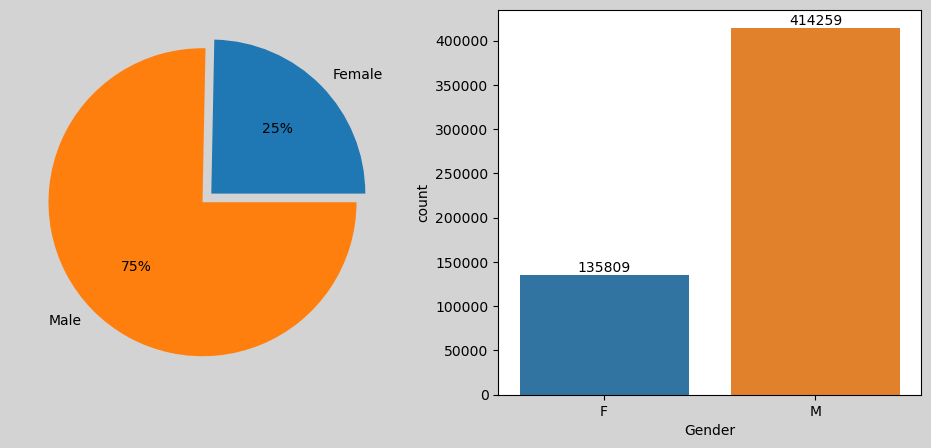

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)

plt.show()

- Out of 0.54 million entries, 75% records are of men and 25% of women.

- Approximately there are 0.41 million records for men and 0.13 for Females.

In [ ]:
df['Age'].unique()


['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

- 40% of the buyers fall under the age group of 26-35 which is the highest amongst all age groups.

- Approximately 0.21 million records are present for age group 26-35 followed by 0.11 million records for group 36-45.

- Age group 0-17 and 55+ are the least frequent buyers which is only 3% and 4% of the data respectively.

- Approximately only 15k and 21k records are there for age group 0-17 and group 55+.

- We can observe that most buyers are in within the age of 18-45 before and after this range we can see less buyers.

In [ ]:
df['City_Category'].unique()


['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

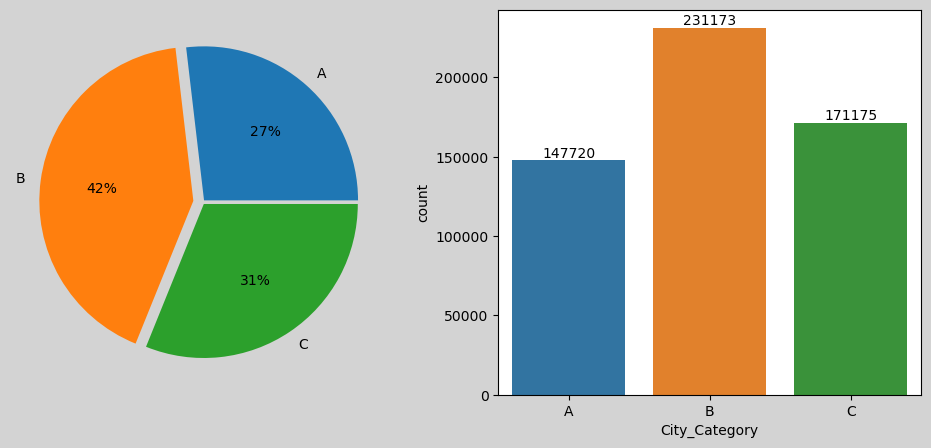

In [ ]:
plt.figure(figsize = (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)

plt.show()

- There are 42% buyers from City Category B, 31% from Category C and 27% from Category A

- Approximately 0.23 million records are present for Category B, 0.17 million for Category C and 0.14 million for category A.

In [ ]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

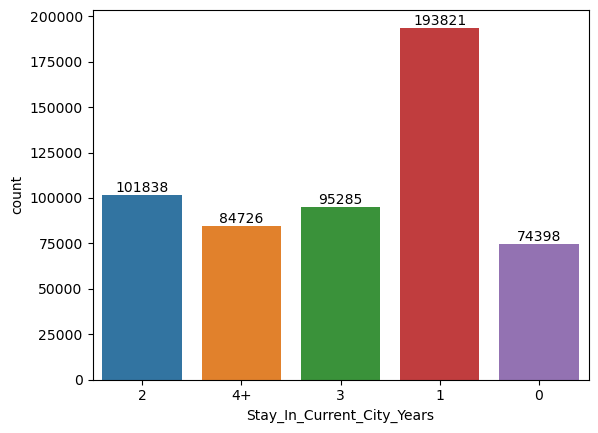

In [ ]:
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

In [ ]:
round(df['Purchase'].describe(),2)


count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

While observing their spending habits of all buyers

- The average order value is 9263.97

- While 50% of the buyers spend an approximate of 8047.

- The lowest order value is as low as 12.

- While, the highest order value is of 23961.

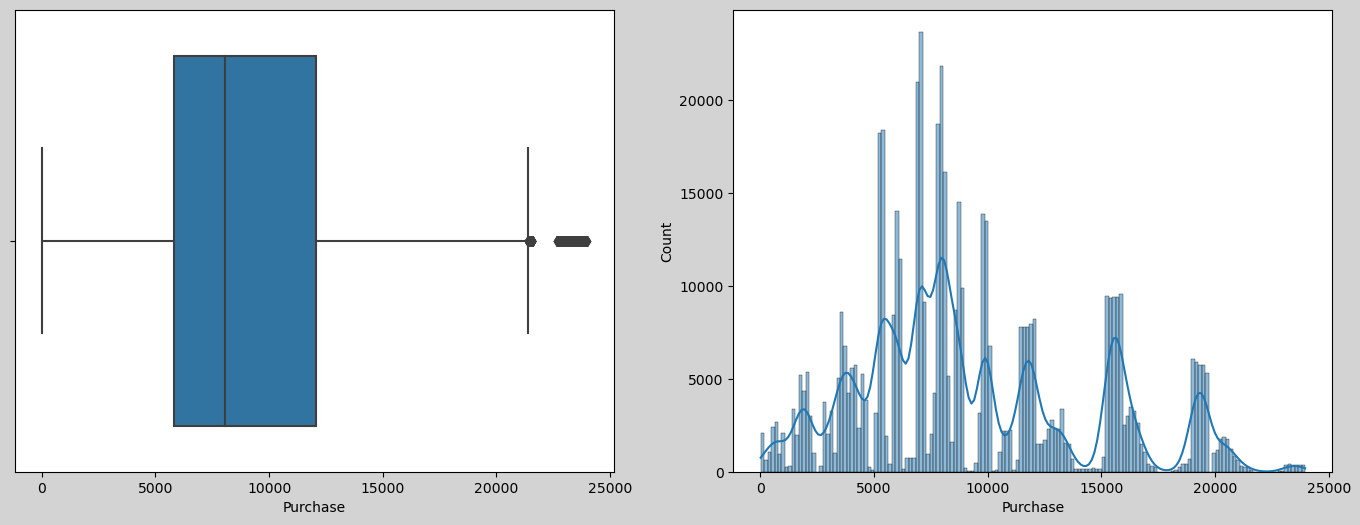

In [ ]:
plt.figure(figsize=(17, 6)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

While observing the purchase values of the orders we can infer that

- Most of the values lies between 6000 and 12000.

- Most order values lies in the range of 5000 - 10000

- There are more orders in the range 15000 - 16000 followed by 11000 - 11500 range and a few also in the 19000 - 20000 range.

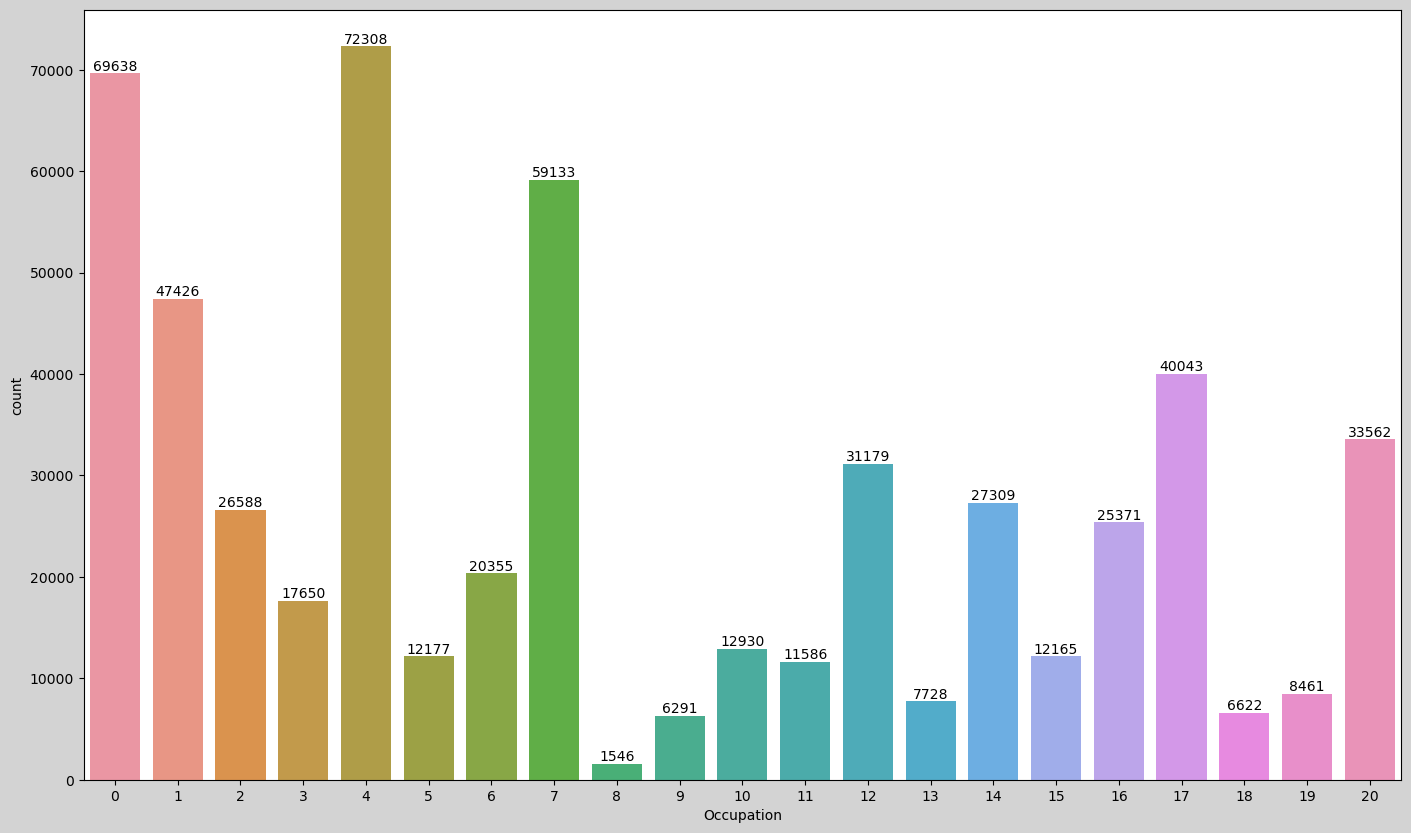

In [ ]:
plt.figure(figsize=(17, 10)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)

- People having occupation 4 are the most frequent buyers followed by occupation 0 and 7.

- People having occupation 8 are the least frequent buyers followed by occupation 9 and 18.

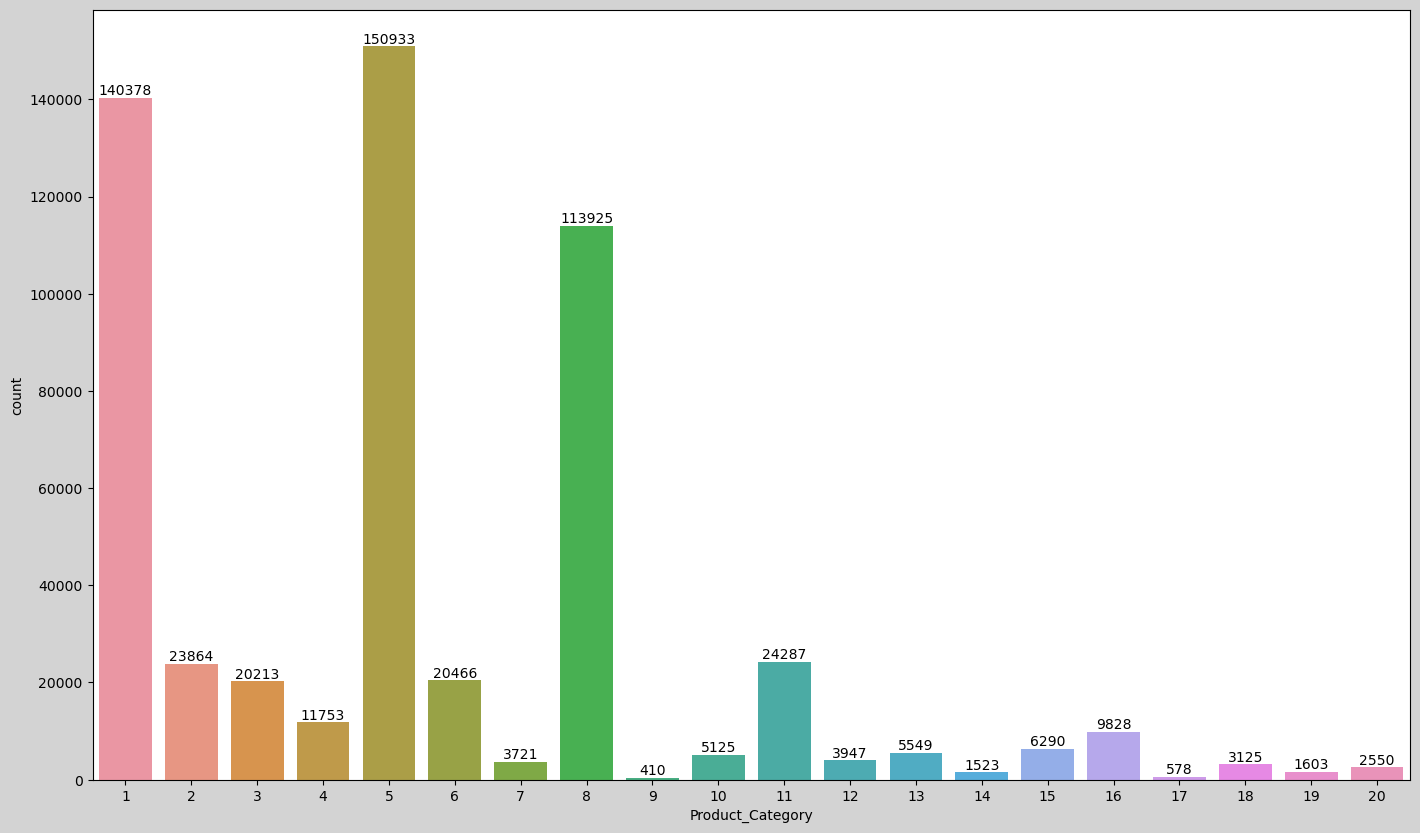

In [ ]:
plt.figure(figsize=(17, 10)).set_facecolor("lightgrey")
label = sns.countplot(data = df, x='Product_Category')
for i in label.containers:
    label.bar_label(i)

- The most frequent bought product category is 5 followed by 1 and 8.

- All the other categories are not much touched.

- The least frequent bought are category 9 followed by 17 and 14.

## Bivariate Analysis
Lets observe gender while purchase habits.

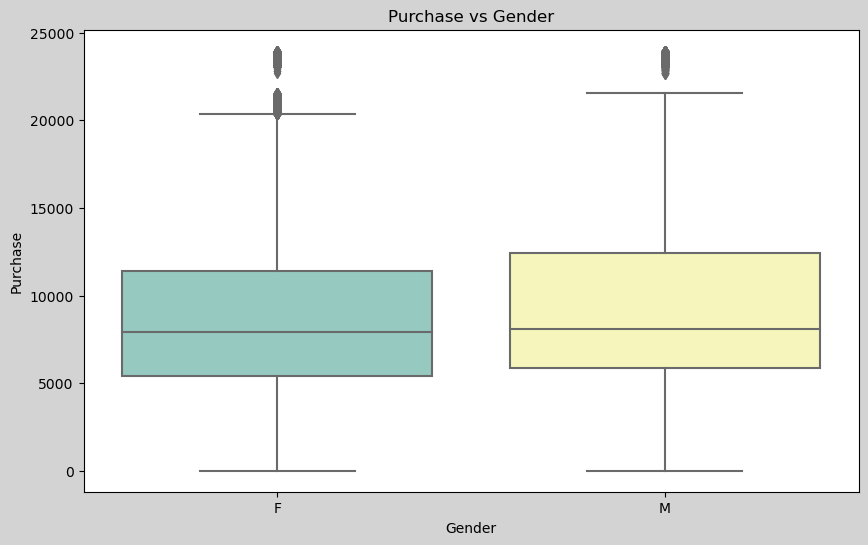

In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Gender', palette = 'Set3')
plt.title('Purchase vs Gender')
plt.show()

We can observe Males spend more than Females.

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


- The average order value for a male is 9437.

- While for a female it is 8734.

- Most of the purchases for men is around 8098 and for females it is around 7914.

- Now, lets see the Purchase habits age group wise

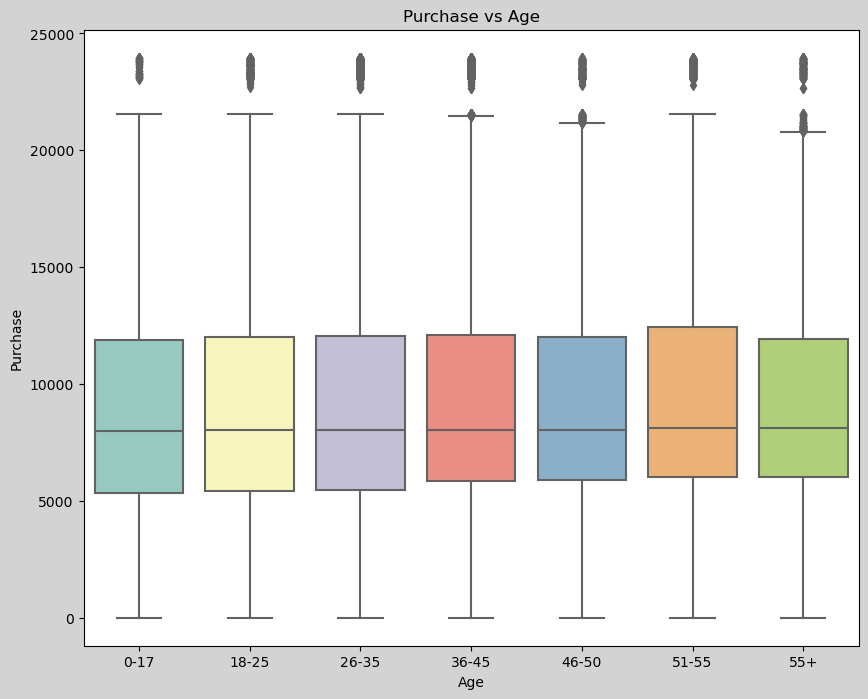

In [ ]:
plt.figure(figsize = (10,8)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Age', palette = 'Set3')
plt.title('Purchase vs Age')
plt.show()

We can not see much difference in the median purchase values for different age groups.
Lets check the mean values

In [ ]:
df.groupby(['Age'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


- The average order value is highest for age group 51-55 which is around 9534.

- While, the average amount is lowest for age group 0-17 which is arouns 8933.

- The highest order value for all the groups is around 23960.

- The losest order value is 12 for all the groups.

Lets see purchase habits according to Occupation

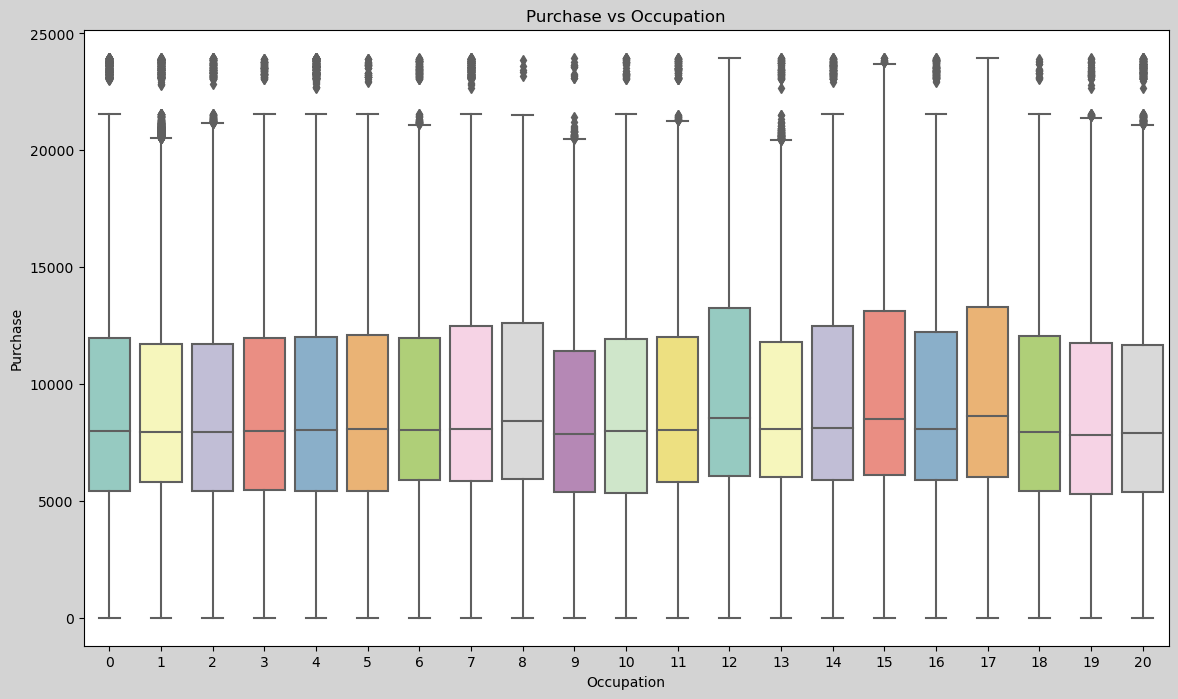

In [ ]:
plt.figure(figsize = (14,8)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Occupation', palette = 'Set3')
plt.title('Purchase vs Occupation')
plt.show()

- There are many outliers in the data.

- We can not see much difference in the median values.

In [ ]:
df.groupby(['Occupation'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


- But, here we can observe that the highest median value is for occupation 17

- The lowest median value is for occupation 19.

- Occupation 17 have the high average order values compared to other occupations which is 9821.

- Occupation 9 have the lowest average order value which is 8637.


Now, lets see city wise purchase habits.



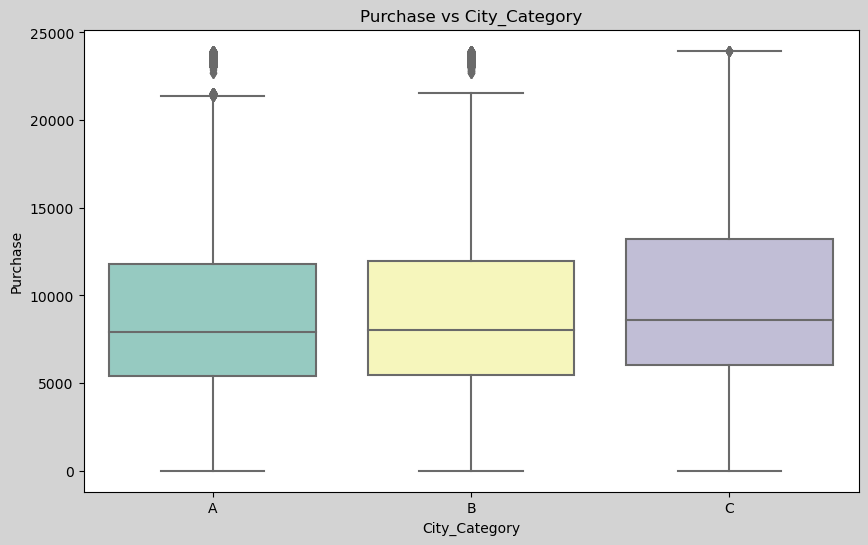

In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')
plt.title('Purchase vs City_Category')
plt.show()

- City Category c has the highest median value followed by city B and city A.
- There are a few outliers fro city A and B.

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


- We can also observe that the mean value for a order is highest for city C followed by B and A.



Lets see if stay years of a person in a city affects his/her purchase habits or not.



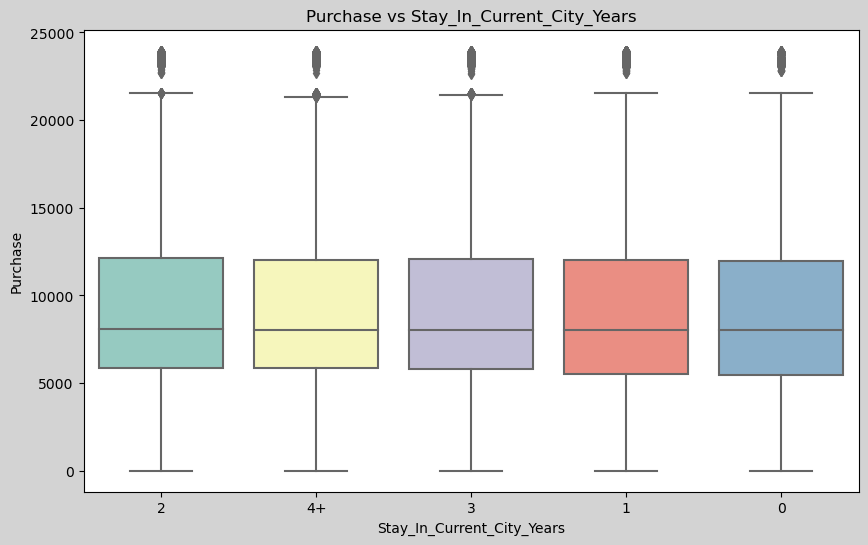

In [ ]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()

We can see that the median value is almost the same for all the years.


In [ ]:
df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


- We can also see that the average order value is also almost the same which lies in the range of 9180 to 9286.

- One more thing we can observe here is that the highest order value is also the same for all the years.

Lets see if Marital Status affects the spending habits of a person



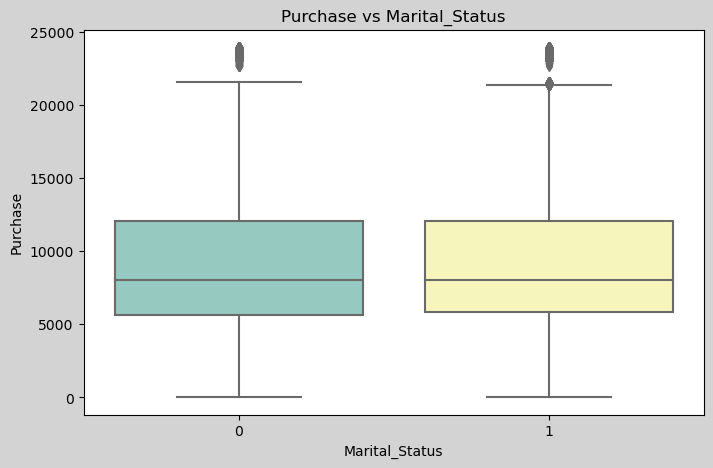

In [ ]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status', palette = 'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

- We can observe that the median value is almost the same.


Lets check the minimum, maximum and average order value.

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


- The minimum and maximum order value is same for both types of people.

- We can observe that the average is also almost the same for both.


Lets see on which product category people spend more or less.



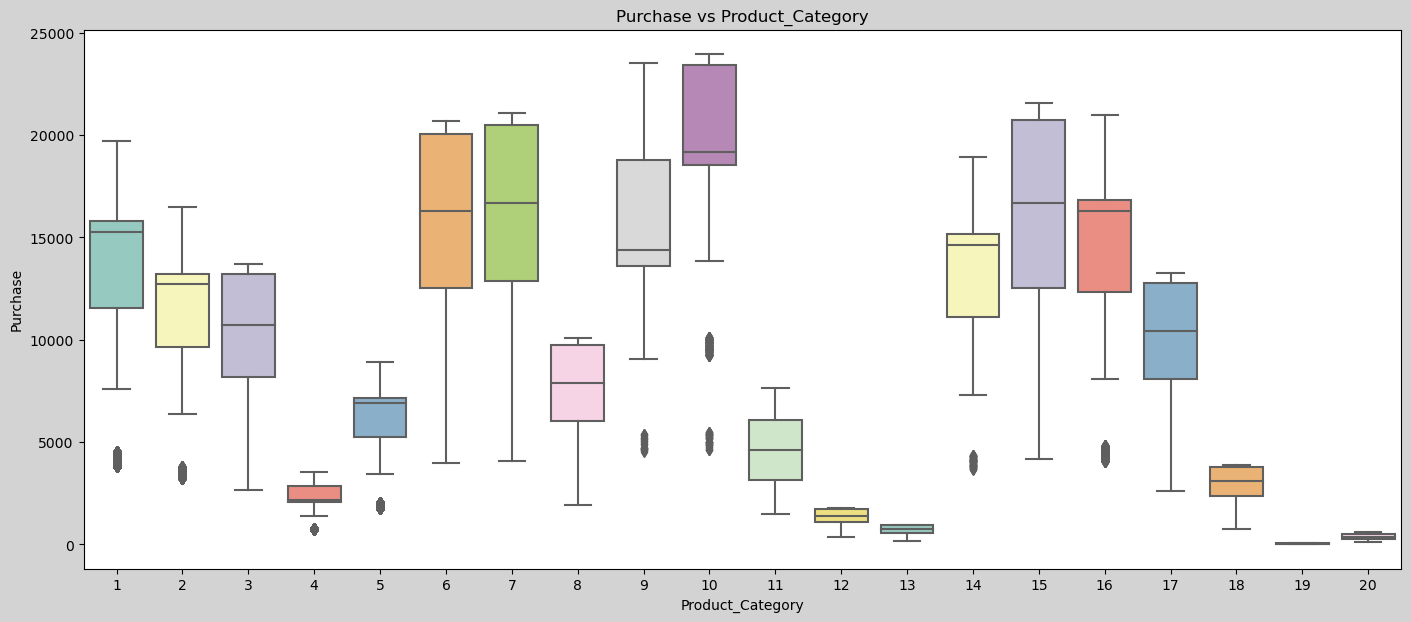

In [ ]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

In [ ]:
df.groupby(['Product_Category'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


- The median value for product category 10 is the highest which is 19197.

- The median value for product category 19 is the lowest which is only 37.

- The average order value for category 10 is the highest which is 19675.

- The average order value for category 19 is also the lowest which is 37.

- Clearly, category 19 is the least preferred or least frequent bought product category.

# Multi-variate Analysis
Lets see Male vs Female Purchase habits age wise.

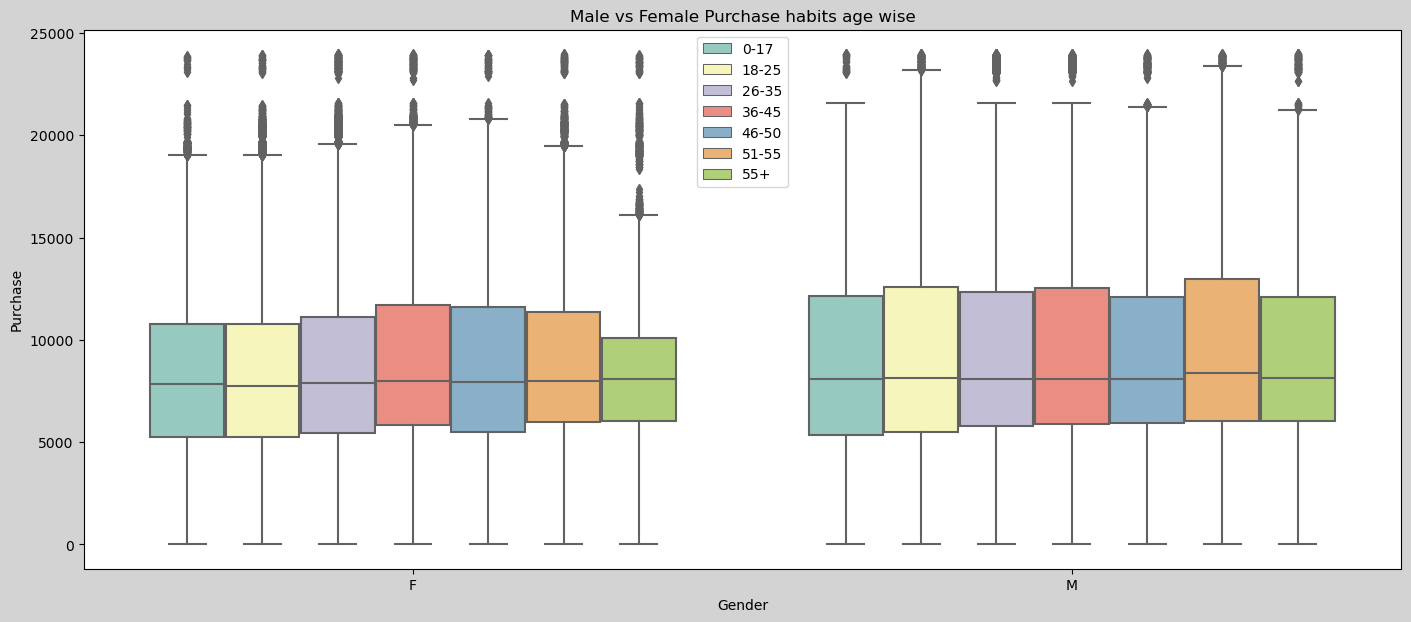

In [ ]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits age wise')

plt.show()

- The median values for 18-25 age females is the lowest and almost same for the rest.

- The median values for all age categories is almost the same and is highest for 51-55 age group.

Lets see Male vs Female City wise purchase habits.

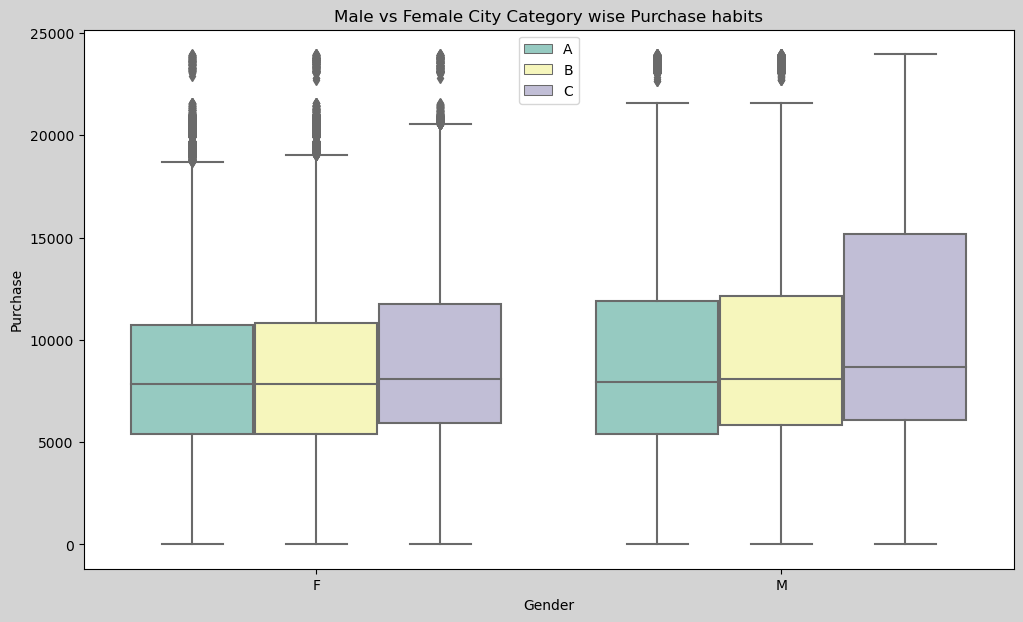

In [ ]:
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.title("Male vs Female City Category wise Purchase habits")
plt.show()

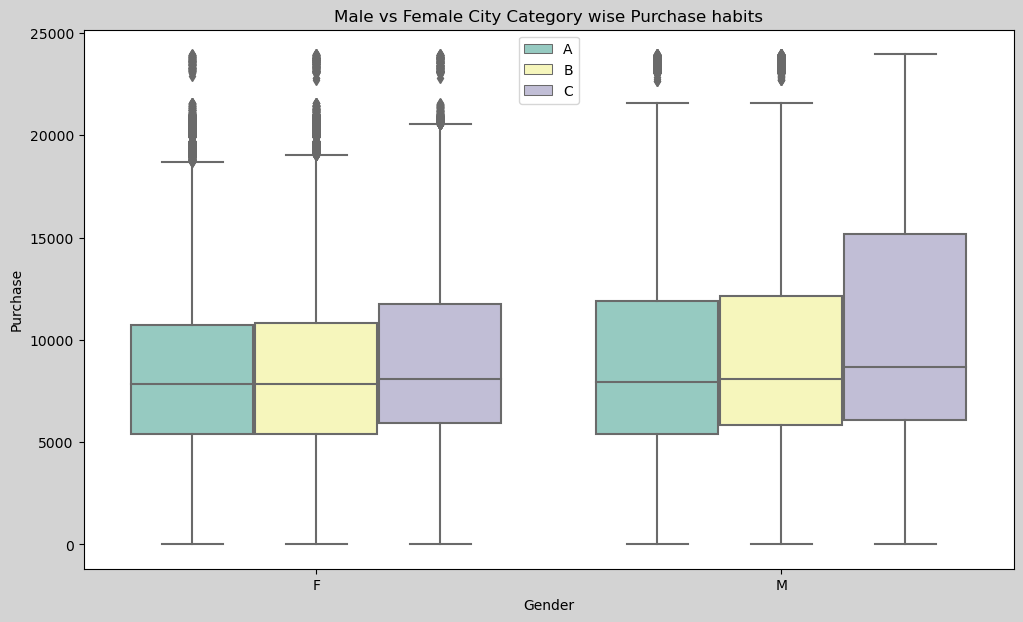

In [ ]:
plt.figure(figsize = (12,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.title("Male vs Female City Category wise Purchase habits")
plt.show()

- The median value for females in city category C is highest compared to city A and B.

- The median value for males in city category C is also highest compared to city A and B.

Lets see Male vs Female Marital Status wise purchase habits.

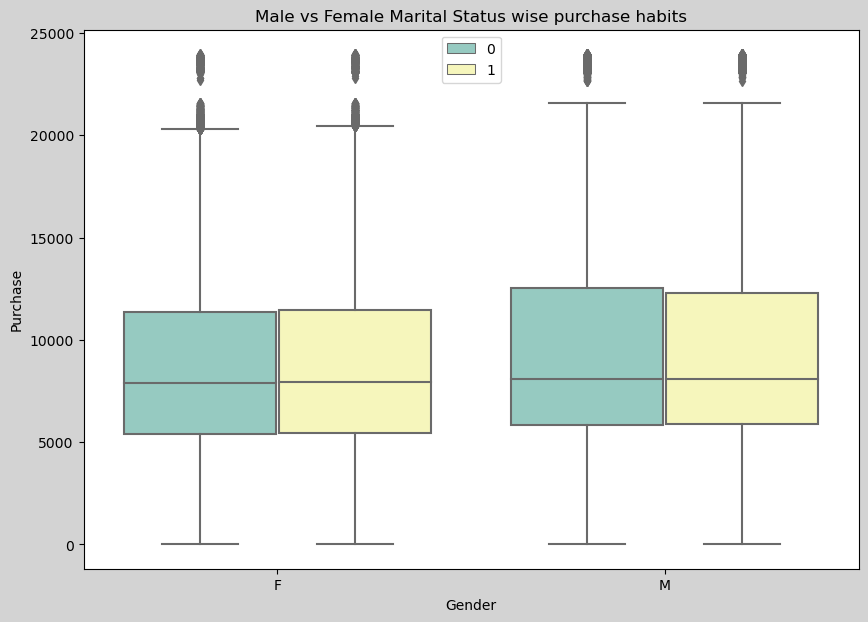

In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Marital Status wise purchase habits')
plt.show()

- There is no effect of marital status on the spending habits of both the genders.

- While we can observe that the median values for Male is higher comapred to Females.

Lets see Male vs Female Stay Years in Current City wise Purchase Habits

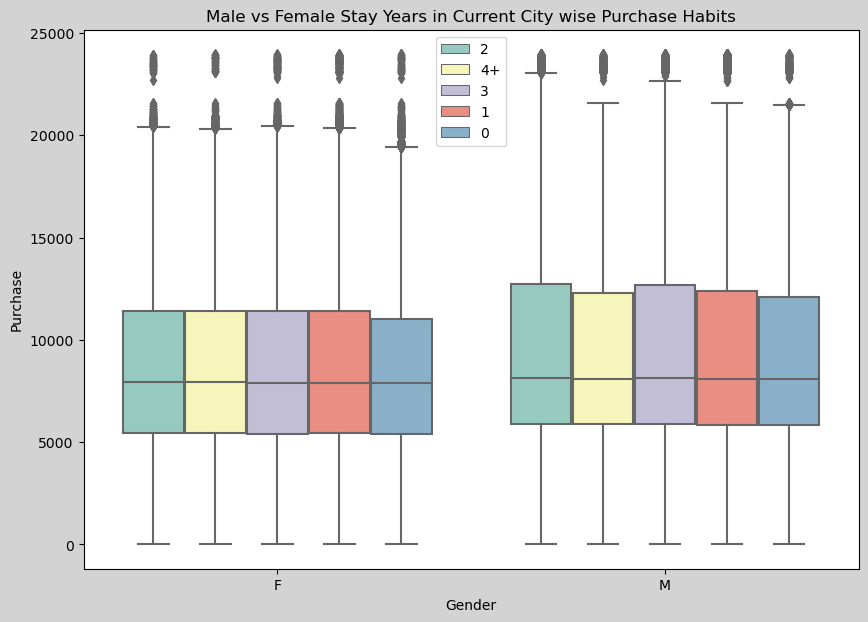

In [ ]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Stay Years in Current City wise Purchase Habits')
plt.show()

- We can observe for females the median values for purchase amount is a little lower for women staying for 3 and 0 years as compared to others.

- For men, there is no much difference.

Lets check the Correlation in the numerical values of the dataset.

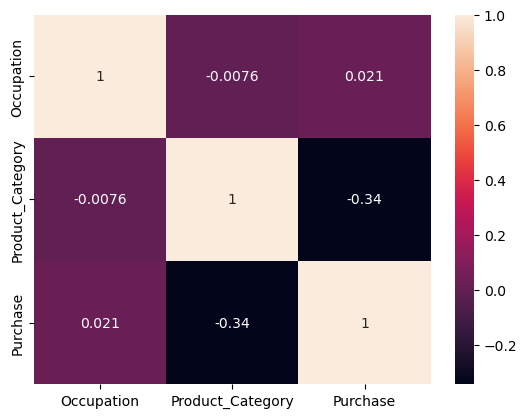

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

We can observe that there is

- High Negative Correlation(-0.0076) between Product Category and Occupation.

- Slight Positive Correlation(0.021) between Purchase and Occupation.

- Negative Correlation(-0.34) between Product Category and Purchase.

Lets plot the pairplot and see relations between the columns.

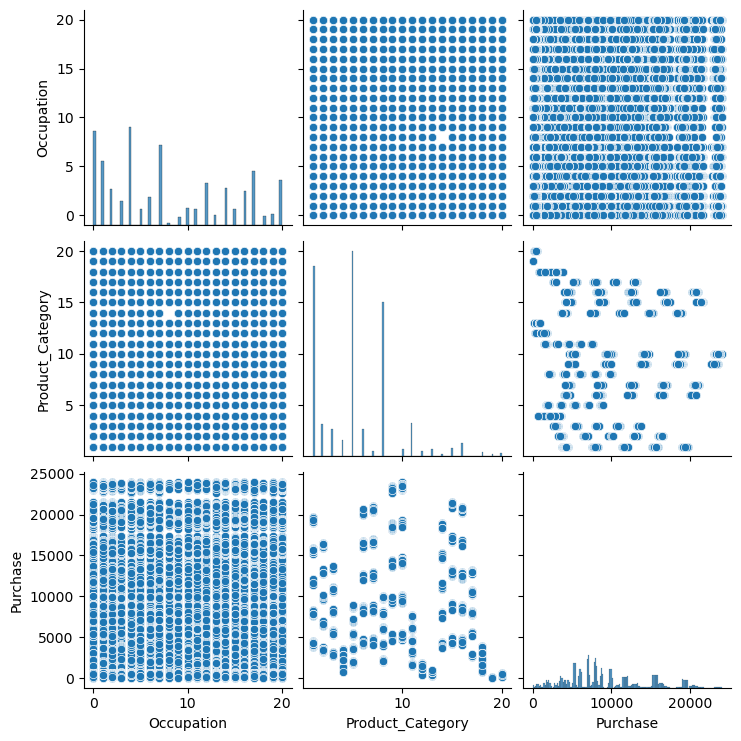

In [ ]:
sns.pairplot(df)
plt.show()

# Central Limit Theorom


In [ ]:
# def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
#     ci = ci/100

#     plt.figure(figsize=(16,8))
#     sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
#     sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

#     # For Sample1's means
#     mean1 = np.mean(sample1_n)
#     sigma1 = np.std(sample1_n)
#     sem1 = stats.sem(sample1_n)

#     lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
#     upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

#     # For Sample2's means
#     mean2 = np.mean(sample2_n)
#     sigma2 = np.std(sample2_n)
#     sem2 = stats.sem(sample2_n)

#     lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
#     upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

#     sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
#     label_mean1=("μ (Males) :  {:.2f}".format(mean1))
#     plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
#     label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
#     plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
#     plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

#     sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
#     label_mean2=("μ (Females):  {:.2f}".format(mean2))
#     plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
#     label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
#     plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
#     plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

#     plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}")
#     plt.legend(loc = 'upper right')
#     plt.xlabel('Purchase')
#     plt.ylabel('Density')


#     return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [ ]:
# df_male = df[df['Gender']=='M']
# df_female = df[df['Gender']=='F']

# Sample Analysis Using Central Limit Theorem and Confidence Interval

CLT and CI analysis for Gender

CLT and CI analysis for Male customers

Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
male_df=df.loc[df['Gender']=='M']['Purchase']
male_df.mean()

9437.526040472265

In [ ]:
male_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_1000.append(bootstraped_mean)

# Calculating CI at 90%,95% and 99% for sample of size 1000



In [ ]:
CI_male_90_1000=np.percentile(male_purchase_mean_1000,[5,95])
CI_male_95_1000=np.percentile(male_purchase_mean_1000,[2.5,97.5])
CI_male_99_1000=np.percentile(male_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_male_90_1000[0],2)} - {np.round(CI_male_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_male_99_1000[0],2)} - {np.round(CI_male_99_1000[1],2)}')

CI at 90% for sample of size 1000: 9170.64 - 9701.82
CI at 95% for sample of size 1000: 9124.35 - 9752.62
CI at 99% for sample of size 1000: 9028.88 - 9859.25


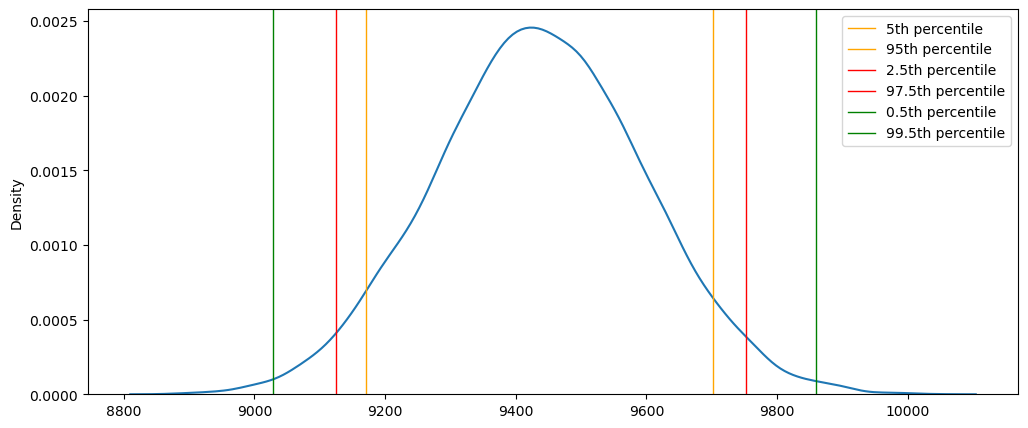

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(male_purchase_mean_1000)
plt.axvline(x=np.percentile(male_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

# Repeating the analysis for sample of size 2500 and 5000



In [ ]:
# Bootstraping means for sample of size 2500
male_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
male_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_5000.append(bootstraped_mean)

In [ ]:
CI_male_90_2500=np.percentile(male_purchase_mean_2500,[5,95])
CI_male_95_2500=np.percentile(male_purchase_mean_2500,[2.5,97.5])
CI_male_99_2500=np.percentile(male_purchase_mean_2500,[0.5,99.5])
CI_male_90_5000=np.percentile(male_purchase_mean_5000,[5,95])
CI_male_95_5000=np.percentile(male_purchase_mean_5000,[2.5,97.5])
CI_male_99_5000=np.percentile(male_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_male_90_2500[0],2)} - {np.round(CI_male_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_male_99_2500[0],2)} - {np.round(CI_male_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_male_90_5000[0],2)} - {np.round(CI_male_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_male_99_5000[0],2)} - {np.round(CI_male_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9269.68 - 9603.66
CI at 95% for sample of size 2500: 9238.83 - 9633.68
CI at 99% for sample of size 2500: 9175.79 - 9704.08
CI at 90% for sample of size 5000: 9319.94 - 9556.0
CI at 95% for sample of size 5000: 9300.03 - 9578.68
CI at 99% for sample of size 5000: 9260.25 - 9622.07


# Visualising bootstraped through histogram to check if its follow normal distribution



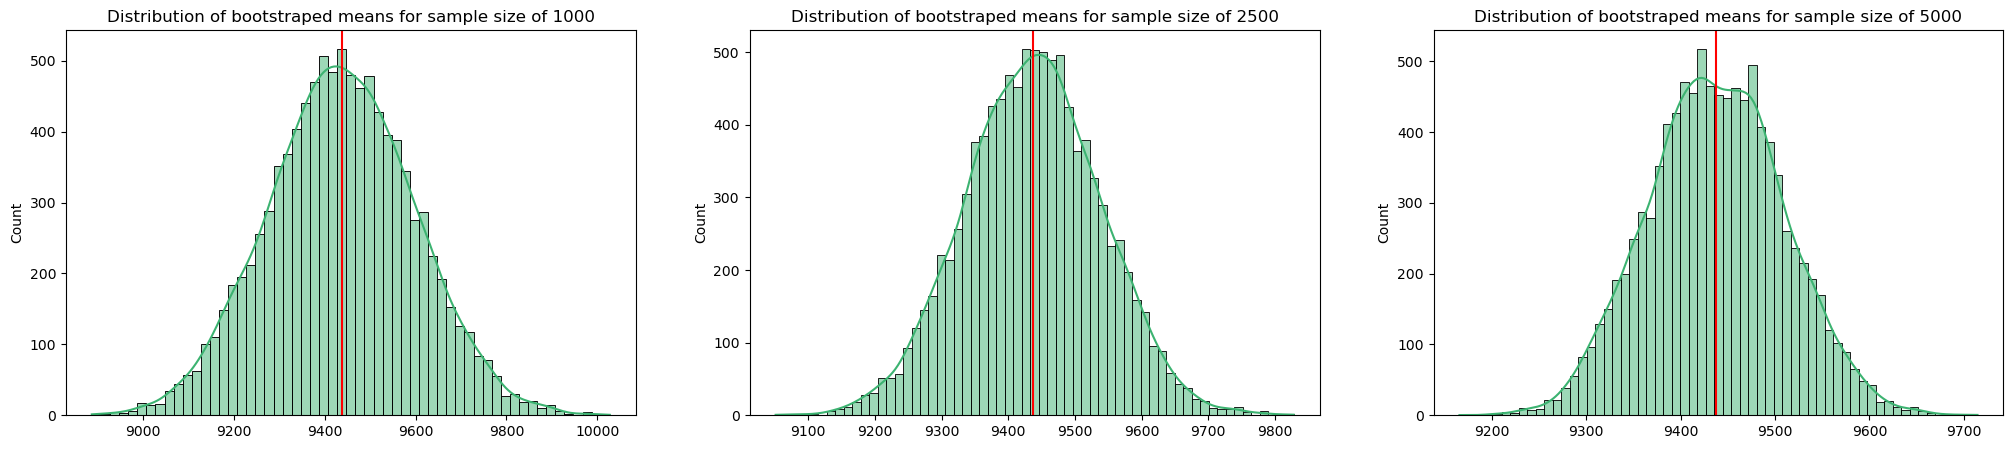

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(male_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(male_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(male_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

### Inference:

- In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.

- As the sample size increases, the distribution of sample means becomes closer to a normal distribution.

#### Calculating the standard error for sample sizes of 1000, 2500, and 5000.



In [ ]:
SE_male_1000 = (male_df.std()/np.sqrt(1000))
SE_male_2500 = (male_df.std()/np.sqrt(2500))
SE_male_5000 = (male_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_male_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_male_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_male_5000,2)}')

Standard error for sample size of 1000: 161.03
Standard error for sample size of 2500: 101.84
Standard error for sample size of 5000: 72.01


# Visualising all analysis using a table



In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_male_1000,SE_male_2500,SE_male_5000],
            'CI_90':[f'{np.round(CI_male_90_1000[0],2)} - {np.round(CI_male_90_1000[1],2)}',
                     f'{np.round(CI_male_90_2500[0],2)} - {np.round(CI_male_90_2500[1],2)}',
                     f'{np.round(CI_male_90_5000[0],2)} - {np.round(CI_male_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_male_99_1000[0],2)} - {np.round(CI_male_99_1000[1],2)}',
                     f'{np.round(CI_male_99_2500[0],2)} - {np.round(CI_male_99_2500[1],2)}',
                     f'{np.round(CI_male_99_5000[0],2)} - {np.round(CI_male_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,161.029067,9170.64 - 9701.82,9124.35 - 9752.62,9028.88 - 9859.25
1,2500,101.843724,9269.68 - 9603.66,9238.83 - 9633.68,9175.79 - 9704.08
2,5000,72.014388,9319.94 - 9556.0,9300.03 - 9578.68,9260.25 - 9622.07


# Inference:

- As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
- The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.


### CLT and CI analysis for Female customers

Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
female_df=df.loc[df['Gender']=='F']['Purchase']
female_df.mean()

8734.565765155476

In [ ]:
female_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_1000.append(bootstraped_mean)

In [ ]:
CI_female_90_1000=np.percentile(female_purchase_mean_1000,[5,95])
CI_female_95_1000=np.percentile(female_purchase_mean_1000,[2.5,97.5])
CI_female_99_1000=np.percentile(female_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_female_90_1000[0],2)} - {np.round(CI_female_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_female_99_1000[0],2)} - {np.round(CI_female_99_1000[1],2)}')

CI at 90% for sample of size 1000: 8489.55 - 8987.09
CI at 95% for sample of size 1000: 8447.2 - 9034.85
CI at 99% for sample of size 1000: 8352.5 - 9115.96


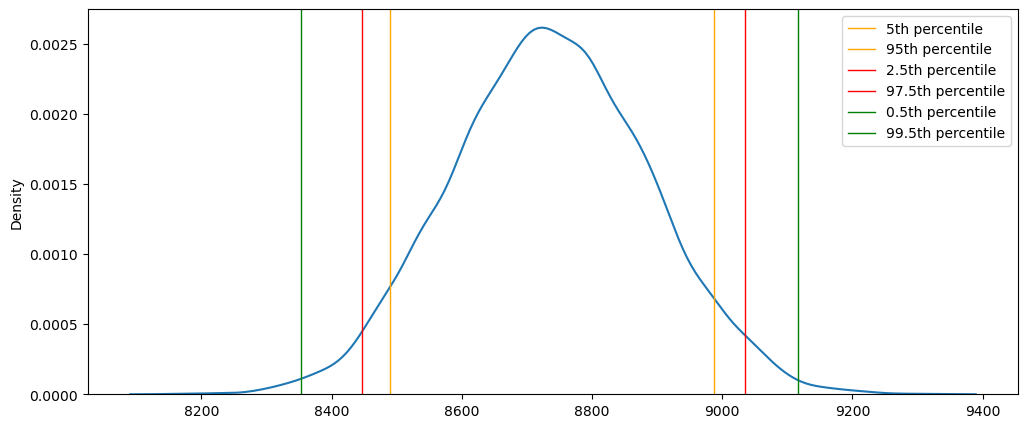

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(female_purchase_mean_1000)
plt.axvline(x=np.percentile(female_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

#### Repeating the analysis for sample of sizes 2500 and 5000



In [ ]:
# Bootstraping means for sample of size 2500
female_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
female_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_5000.append(bootstraped_mean)

In [ ]:
CI_female_90_2500=np.percentile(female_purchase_mean_2500,[5,95])
CI_female_95_2500=np.percentile(female_purchase_mean_2500,[2.5,97.5])
CI_female_99_2500=np.percentile(female_purchase_mean_2500,[0.5,99.5])
CI_female_90_5000=np.percentile(female_purchase_mean_5000,[5,95])
CI_female_95_5000=np.percentile(female_purchase_mean_5000,[2.5,97.5])
CI_female_99_5000=np.percentile(female_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_female_90_2500[0],2)} - {np.round(CI_female_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_female_99_2500[0],2)} - {np.round(CI_female_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_female_90_5000[0],2)} - {np.round(CI_female_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_female_99_5000[0],2)} - {np.round(CI_female_99_5000[1],2)}')

CI at 90% for sample of size 2500: 8578.53 - 8892.73
CI at 95% for sample of size 2500: 8548.65 - 8924.46
CI at 99% for sample of size 2500: 8489.51 - 8979.43
CI at 90% for sample of size 5000: 8625.86 - 8847.79
CI at 95% for sample of size 5000: 8605.22 - 8868.85
CI at 99% for sample of size 5000: 8567.12 - 8909.5


### Visualising bootstraped means through histogram in order to check that it follows normal distribution

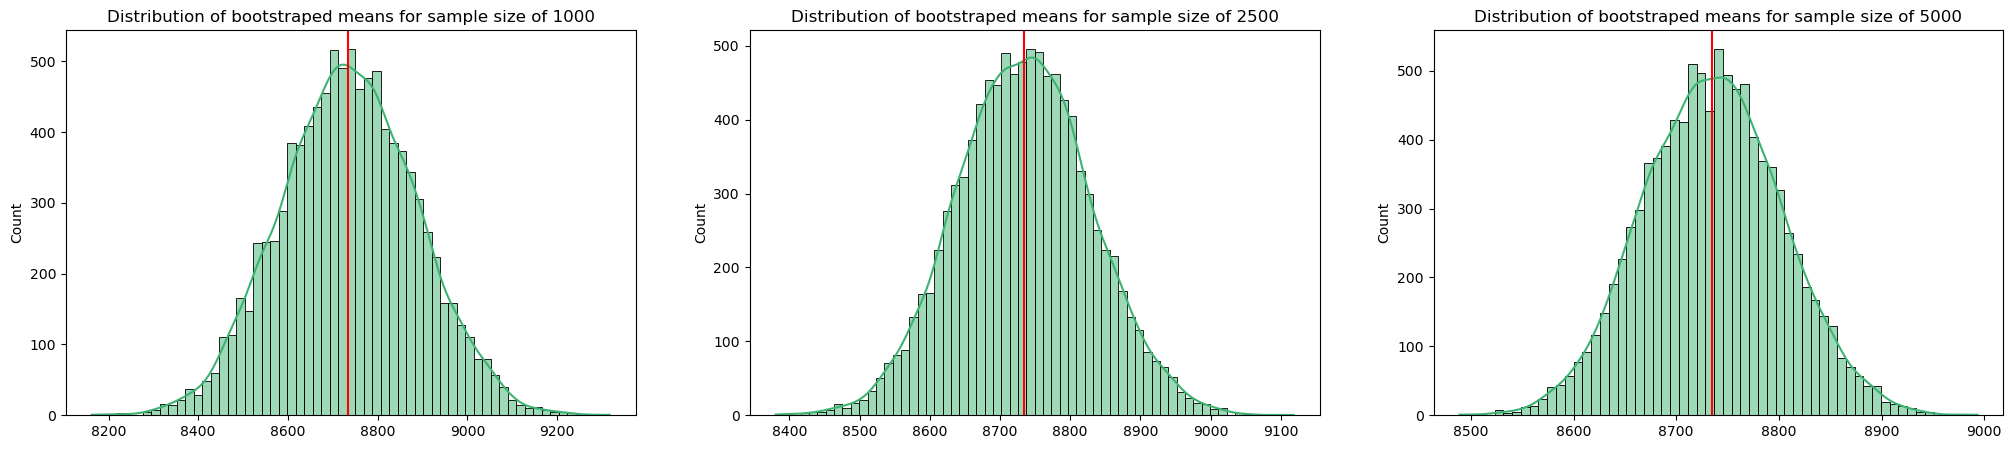

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(female_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(female_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(female_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

# Inference:

- In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
- As the sample size increases, the distribution of sample means becomes closer to a normal distribution.

#### Calculating the standard error for sample sizes of 1000, 2500, and 5000.

In [ ]:
SE_female_1000 = (female_df.std()/np.sqrt(1000))
SE_female_2500 = (female_df.std()/np.sqrt(2500))
SE_female_5000 = (female_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_female_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_female_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_female_5000,2)}')

Standard error for sample size of 1000: 150.75
Standard error for sample size of 2500: 95.34
Standard error for sample size of 5000: 67.42


#### Visualising all analysis using a table

In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_female_1000,SE_female_2500,SE_female_5000],
            'CI_90':[f'{np.round(CI_female_90_1000[0],2)} - {np.round(CI_female_90_1000[1],2)}',
                     f'{np.round(CI_female_90_2500[0],2)} - {np.round(CI_female_90_2500[1],2)}',
                     f'{np.round(CI_female_90_5000[0],2)} - {np.round(CI_female_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_female_99_1000[0],2)} - {np.round(CI_female_99_1000[1],2)}',
                     f'{np.round(CI_female_99_2500[0],2)} - {np.round(CI_female_99_2500[1],2)}',
                     f'{np.round(CI_female_99_5000[0],2)} - {np.round(CI_female_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,150.753153,8489.55 - 8987.09,8447.2 - 9034.85,8352.5 - 9115.96
1,2500,95.344666,8578.53 - 8892.73,8548.65 - 8924.46,8489.51 - 8979.43
2,5000,67.418860,8625.86 - 8847.79,8605.22 - 8868.85,8567.12 - 8909.5


### Comparing CI at 95% for female and male customers for sample sizes of 1000,2500 and 5000

In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],

             'CI_95_male':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             'CI_95_female':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}']})

,Sample Size,CI_95_male,CI_95_female
0,1000,9124.35 - 9752.62,8447.2 - 9034.85
1,2500,9238.83 - 9633.68,8548.65 - 8924.46
2,5000,9300.03 - 9578.68,8605.22 - 8868.85


### Inference:

With a 95% confidence level, the confidence interval for male customers is consistently both higher and wider than the confidence interval for female customers across all provided sample sizes(1000,2500,5000). This suggests a statistically supported conclusion that male customers spend more money per transaction than female customers.

#### Comparing CI for male and Female customers at 95% using KDE plot

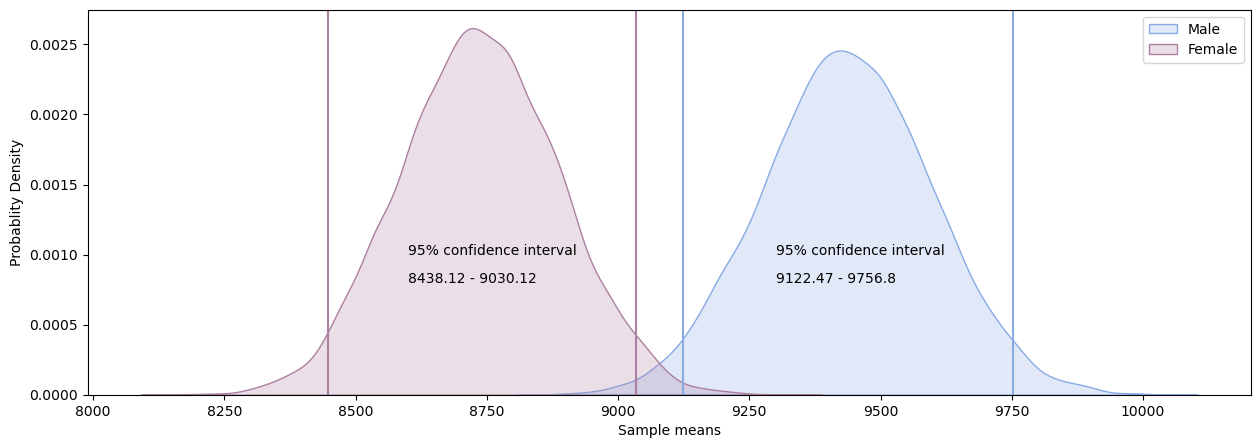

In [ ]:
plt.figure(figsize=(15,5))

sns.kdeplot(male_purchase_mean_1000,color='#89AAE6',fill=True,label='Male')
sns.kdeplot(female_purchase_mean_1000,color='#AC80A0',fill=True,label='Female')
plt.axvline(np.percentile(male_purchase_mean_1000,[2.5]),0,1,color='#89AAE6')
plt.axvline(np.percentile(male_purchase_mean_1000,[97.5]),0,1,color='#89AAE6')
plt.axvline(np.percentile(female_purchase_mean_1000,[2.5]),0,1,color='#AC80A0')
plt.axvline(np.percentile(female_purchase_mean_1000,[97.5]),0,1,color='#AC80A0')
plt.annotate('95% confidence interval',xy=(9300,0.0010),size=10)
plt.annotate('9122.47 - 9756.8',xy=(9300,0.0008),size=10)
plt.annotate('95% confidence interval',xy=(8600,0.0010),size=10)
plt.annotate('8438.12 - 9030.12',xy=(8600,0.0008),size=10)
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

## Inference

- Confidence intervals at 95 % for male and female customers does not overlap.
- With a 95% confidence level, the confidence interval for male customers is consistently both higher and wider than the confidence interval for female customers for a sample size of 1000. This statistically indicates that male customers tend to spend more money per transaction than female customers.

- CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 75.3% purchases are from male and only 24.7% purchases are from female).
- The confidence interval for male purchases is consistently both higher and wider than the confidence interval for female purchases. This statistically indicates that male customers tend to spend more money per transaction than female customers.

#### Q2.Confidence intervals and distribution of the mean of the expenses by female and male customers



In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],

             'CI_95_male':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             'CI_95_female':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}']})

,Sample Size,CI_95_male,CI_95_female
0,1000,9124.35 - 9752.62,8447.2 - 9034.85
1,2500,9238.83 - 9633.68,8548.65 - 8924.46
2,5000,9300.03 - 9578.68,8605.22 - 8868.85


### CI and CLT analysis for Marital Status
### CI and CLT analysis for Married Customers
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
married_df=df.loc[df['Marital_Status']==1]['Purchase']
married_df.mean()

9261.174574082374

In [ ]:
married_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_1000.append(bootstraped_mean)

In [ ]:
CI_married_90_1000=np.percentile(married_purchase_mean_1000,[5,95])
CI_married_95_1000=np.percentile(married_purchase_mean_1000,[2.5,97.5])
CI_married_99_1000=np.percentile(married_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_married_90_1000[0],2)} - {np.round(CI_married_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_married_99_1000[0],2)} - {np.round(CI_married_99_1000[1],2)}')

CI at 90% for sample of size 1000: 8999.8 - 9528.37
CI at 95% for sample of size 1000: 8948.17 - 9580.51
CI at 99% for sample of size 1000: 8858.5 - 9681.1


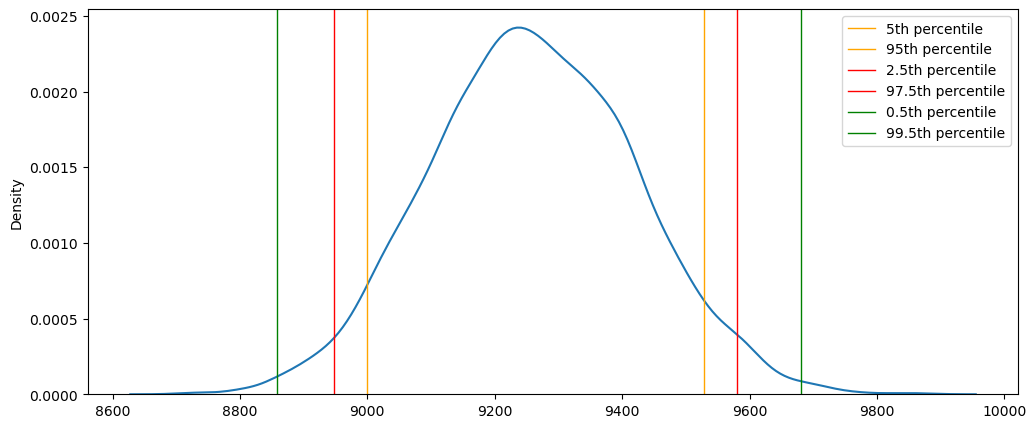

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(married_purchase_mean_1000)
plt.axvline(x=np.percentile(married_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

In [ ]:
# Bootstraping means for sample of size 2500
married_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
married_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_5000.append(bootstraped_mean)


In [ ]:
CI_married_90_2500=np.percentile(married_purchase_mean_2500,[5,95])
CI_married_95_2500=np.percentile(married_purchase_mean_2500,[2.5,97.5])
CI_married_99_2500=np.percentile(married_purchase_mean_2500,[0.5,99.5])
CI_married_90_5000=np.percentile(married_purchase_mean_5000,[5,95])
CI_married_95_5000=np.percentile(married_purchase_mean_5000,[2.5,97.5])
CI_married_99_5000=np.percentile(married_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_married_90_2500[0],2)} - {np.round(CI_married_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_married_99_2500[0],2)} - {np.round(CI_married_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_married_90_5000[0],2)} - {np.round(CI_married_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_married_99_5000[0],2)} - {np.round(CI_married_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9095.77 - 9425.46
CI at 95% for sample of size 2500: 9063.73 - 9463.13
CI at 99% for sample of size 2500: 9001.97 - 9530.79
CI at 90% for sample of size 5000: 9145.77 - 9378.92
CI at 95% for sample of size 5000: 9125.41 - 9400.94
CI at 99% for sample of size 5000: 9082.32 - 9442.23


## Visualising bootstraped means through histogram in order to check that it follows normal distribution



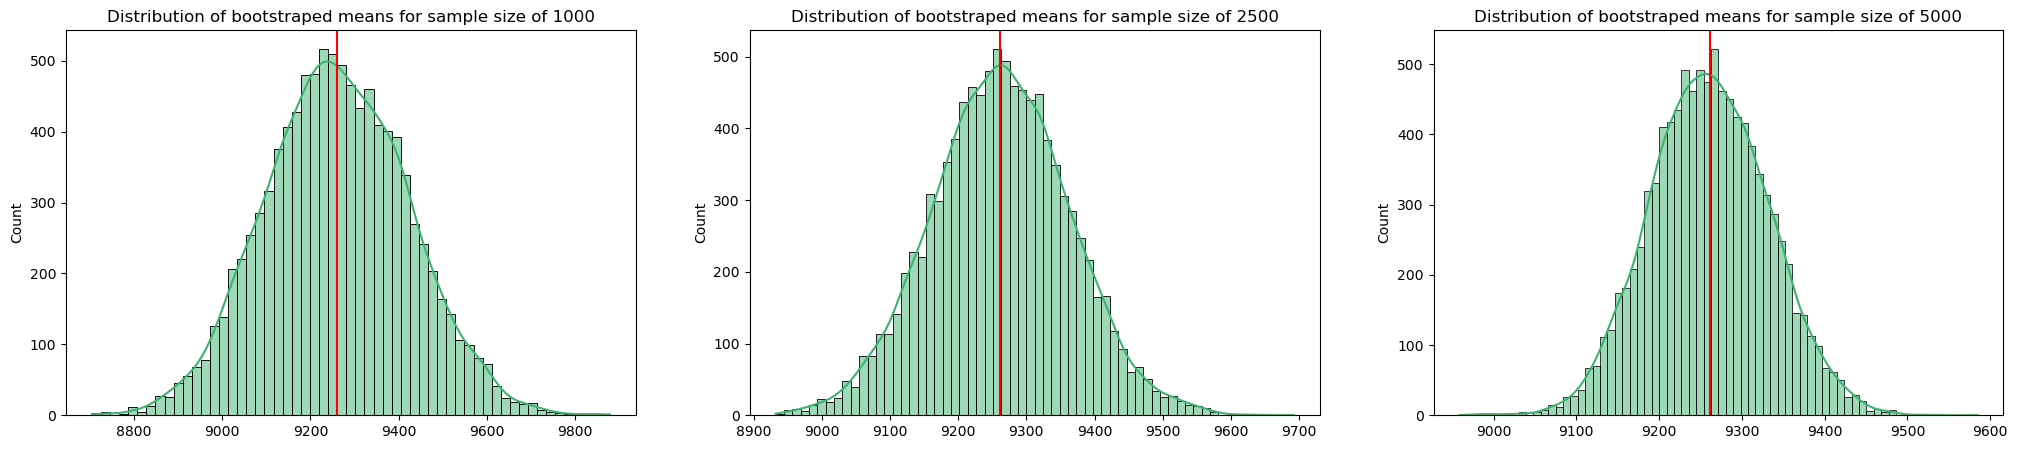

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(married_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(married_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(married_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

# Inference:

- In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
- As the sample size increases, the distribution of sample means becomes closer to a normal distribution.
Calculating the standard error for sample sizes of 1000, 2500, and 5000

In [ ]:
# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_married_1000 = (married_df.std()/np.sqrt(1000))
SE_married_2500 = (married_df.std()/np.sqrt(2500))
SE_married_5000 = (married_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_married_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_married_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_married_5000,2)}')

Standard error for sample size of 1000: 158.65
Standard error for sample size of 2500: 100.34
Standard error for sample size of 5000: 70.95


### Visualising all analysis using a table

In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_married_1000,SE_married_2500,SE_married_5000],
            'CI_90':[f'{np.round(CI_married_90_1000[0],2)} - {np.round(CI_married_90_1000[1],2)}',
                     f'{np.round(CI_married_90_2500[0],2)} - {np.round(CI_married_90_2500[1],2)}',
                     f'{np.round(CI_married_90_5000[0],2)} - {np.round(CI_married_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}',
                     f'{np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}',
                     f'{np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_married_99_1000[0],2)} - {np.round(CI_married_99_1000[1],2)}',
                     f'{np.round(CI_married_99_2500[0],2)} - {np.round(CI_married_99_2500[1],2)}',
                     f'{np.round(CI_married_99_5000[0],2)} - {np.round(CI_married_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,158.648225,8999.8 - 9528.37,8948.17 - 9580.51,8858.5 - 9681.1
1,2500,100.337948,9095.77 - 9425.46,9063.73 - 9463.13,9001.97 - 9530.79
2,5000,70.949643,9145.77 - 9378.92,9125.41 - 9400.94,9082.32 - 9442.23


# Inference:

- As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
- The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

#### CLT and CI analysis for Unmarried Customers

Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
unmarried_df=df.loc[df['Marital_Status']== 0]['Purchase']
unmarried_df.mean()

9265.907618921507

In [ ]:
unmarried_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_1000.append(bootstraped_mean)
CI_unmarried_90_1000=np.percentile(unmarried_purchase_mean_1000,[5,95])
CI_unmarried_95_1000=np.percentile(unmarried_purchase_mean_1000,[2.5,97.5])
CI_unmarried_99_1000=np.percentile(unmarried_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_unmarried_90_1000[0],2)} - {np.round(CI_unmarried_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_unmarried_99_1000[0],2)} - {np.round(CI_unmarried_99_1000[1],2)}')

CI at 90% for sample of size 1000: 9004.09 - 9529.5
CI at 95% for sample of size 1000: 8960.53 - 9584.01
CI at 99% for sample of size 1000: 8867.87 - 9688.72


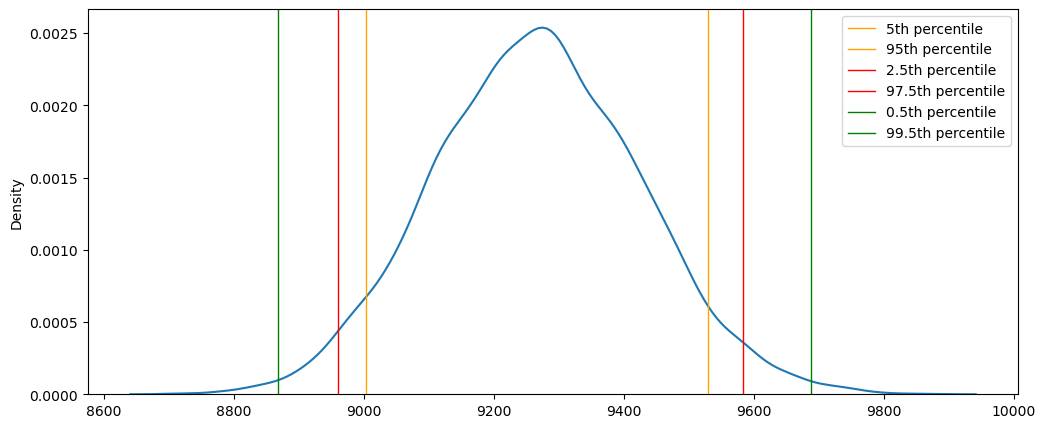

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_1000)
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

#### Repeating Analysis for sample of sizes 2500 and 5000



In [ ]:
unmarried_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
unmarried_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_5000.append(bootstraped_mean)

CI_unmarried_90_2500=np.percentile(unmarried_purchase_mean_2500,[5,95])
CI_unmarried_95_2500=np.percentile(unmarried_purchase_mean_2500,[2.5,97.5])
CI_unmarried_99_2500=np.percentile(unmarried_purchase_mean_2500,[0.5,99.5])
CI_unmarried_90_5000=np.percentile(unmarried_purchase_mean_5000,[5,95])
CI_unmarried_95_5000=np.percentile(unmarried_purchase_mean_5000,[2.5,97.5])
CI_unmarried_99_5000=np.percentile(unmarried_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_unmarried_90_2500[0],2)} - {np.round(CI_unmarried_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_unmarried_99_2500[0],2)} - {np.round(CI_unmarried_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_unmarried_90_5000[0],2)} - {np.round(CI_unmarried_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_unmarried_99_5000[0],2)} - {np.round(CI_unmarried_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9103.99 - 9432.86
CI at 95% for sample of size 2500: 9074.38 - 9464.37
CI at 99% for sample of size 2500: 9020.79 - 9529.77
CI at 90% for sample of size 5000: 9148.18 - 9385.02
CI at 95% for sample of size 5000: 9124.93 - 9405.25
CI at 99% for sample of size 5000: 9082.59 - 9451.04


Visualising bootstraped means through histogram in order to check that it follows normal distribution



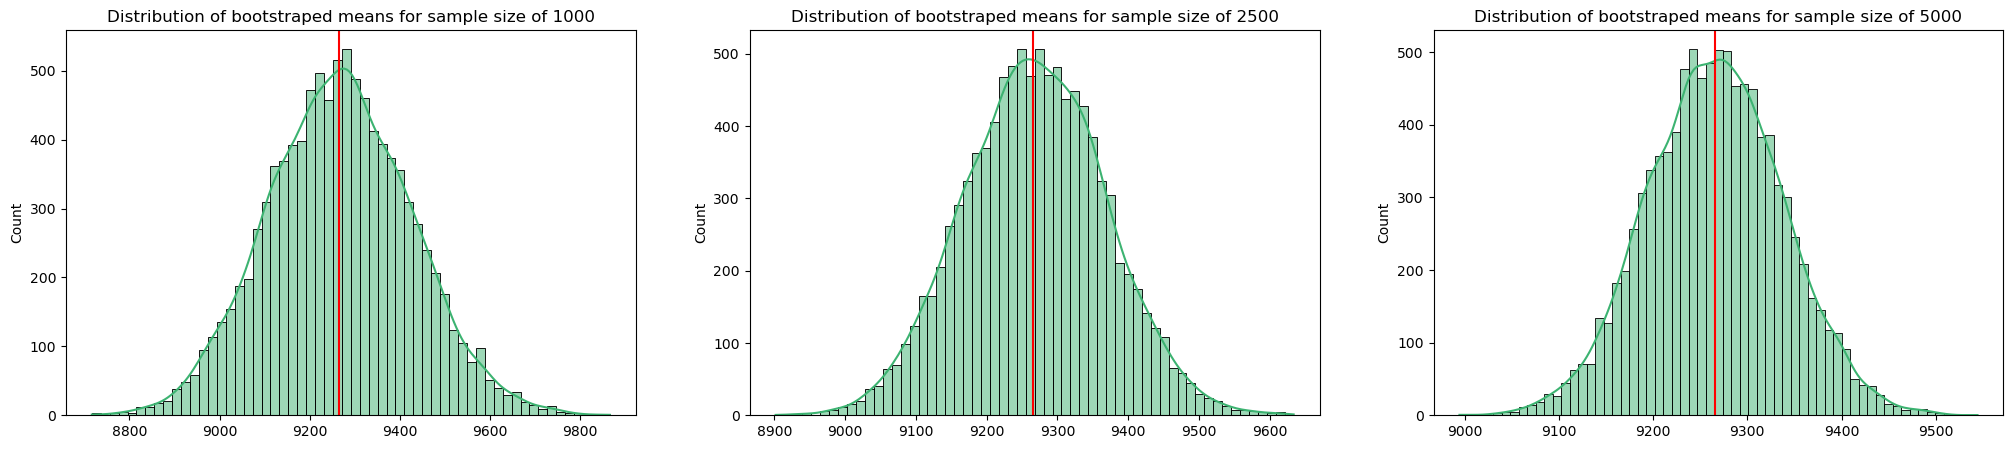

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(unmarried_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(unmarried_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(unmarried_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

### Inference:

- In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
- As the sample size increases, the distribution of sample means becomes closer to a normal distribution

#### Calculating the standard error for sample sizes of 1000, 2500, and 5000

In [ ]:
# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_unmarried_1000 = (unmarried_df.std()/np.sqrt(1000))
SE_unmarried_2500 = (unmarried_df.std()/np.sqrt(2500))
SE_unmarried_5000 = (unmarried_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_unmarried_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_unmarried_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_unmarried_5000,2)}')

Standard error for sample size of 1000: 158.98
Standard error for sample size of 2500: 100.55
Standard error for sample size of 5000: 71.1


### Visualising all analysis using a table

In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_unmarried_1000,SE_unmarried_2500,SE_unmarried_5000],
            'CI_90':[f'{np.round(CI_unmarried_90_1000[0],2)} - {np.round(CI_unmarried_90_1000[1],2)}',
                     f'{np.round(CI_unmarried_90_2500[0],2)} - {np.round(CI_unmarried_90_2500[1],2)}',
                     f'{np.round(CI_unmarried_90_5000[0],2)} - {np.round(CI_unmarried_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}',
                     f'{np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}',
                     f'{np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_unmarried_99_1000[0],2)} - {np.round(CI_unmarried_99_1000[1],2)}',
                     f'{np.round(CI_unmarried_99_2500[0],2)} - {np.round(CI_unmarried_99_2500[1],2)}',
                     f'{np.round(CI_unmarried_99_5000[0],2)} - {np.round(CI_unmarried_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,158.978698,9004.09 - 9529.5,8960.53 - 9584.01,8867.87 - 9688.72
1,2500,100.546957,9103.99 - 9432.86,9074.38 - 9464.37,9020.79 - 9529.77
2,5000,71.097435,9148.18 - 9385.02,9124.93 - 9405.25,9082.59 - 9451.04


# Inference:

- As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
- The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

# Conclusion

Comparing confidence interval for married and unmarried customers at 95% and sample size is 1000

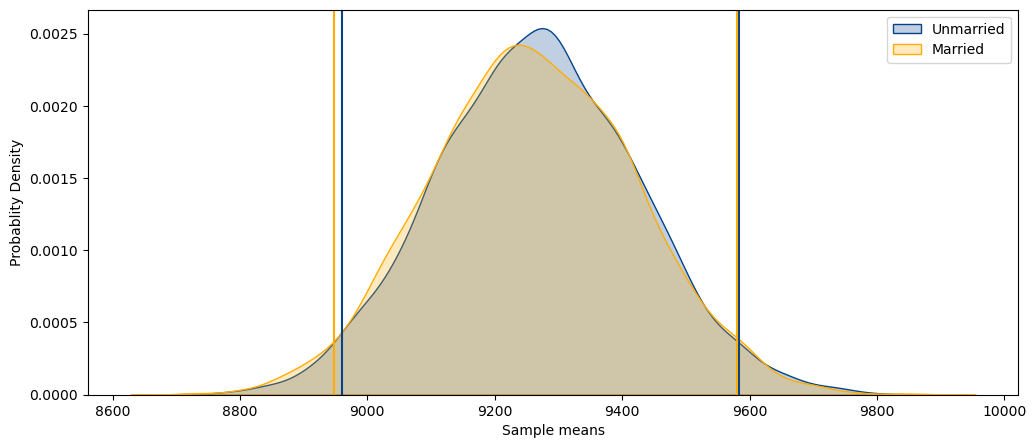

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_1000,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_1000,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_1000,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_1000,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_1000,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_1000,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

### Comparing confidence interval for married and unmarried customers at 95% and sample size is 2500

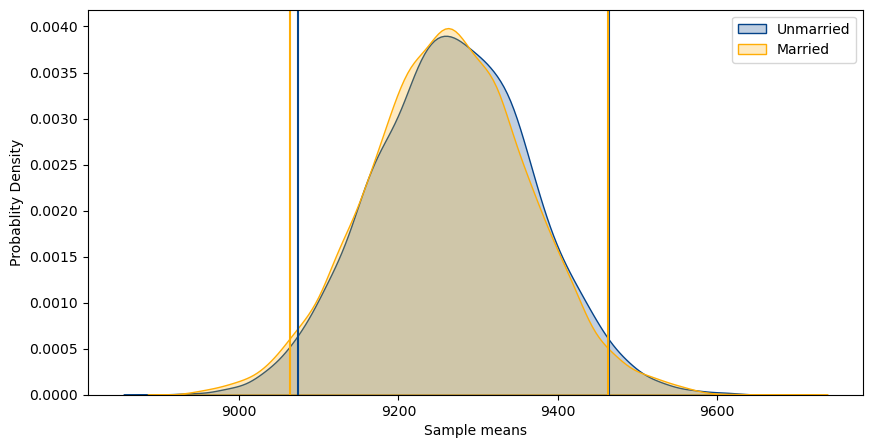

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(unmarried_purchase_mean_2500,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_2500,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_2500,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_2500,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_2500,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_2500,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

### Comparing confidence interval for married and unmarried customers at 95% and sample size is 2500

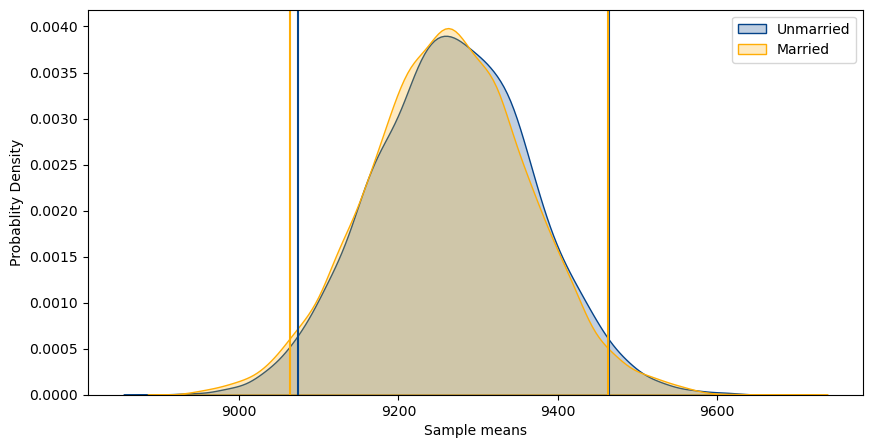

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(unmarried_purchase_mean_2500,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_2500,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_2500,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_2500,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_2500,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_2500,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

### Comparing confidence interval for married and unmarried customers at 95% and sample size is 5000



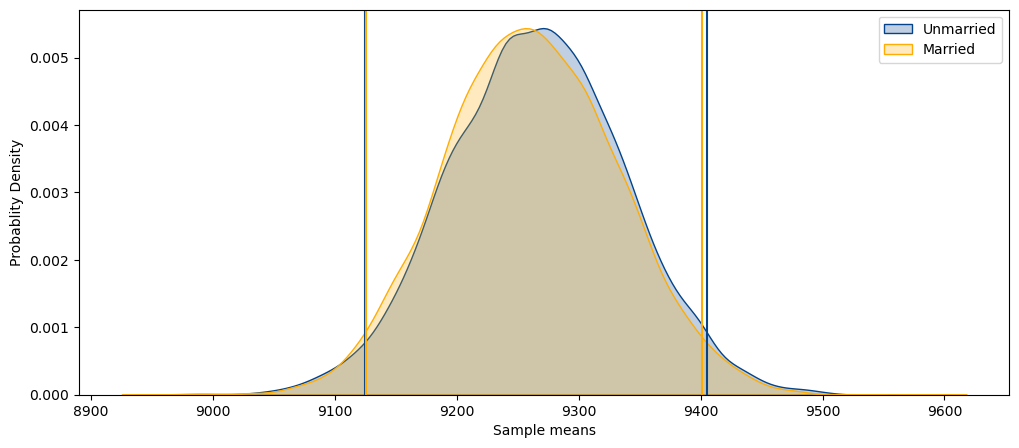

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_5000,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_5000,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_5000,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_5000,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_5000,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_5000,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

# Inference:

- The confidence intervals for married and unmarried customers overlap, suggesting that both male and female customers spend a similar amount per transaction. This means that the spending behavior of married and unmarried customers is alike.

- confidence intervals of average married and unmarried spending overlapping.
The overlapping confidence intervals of average spending for married and unmarried customers indicate that both male and female customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
- Instead of allocating resources and time to differentiate between "Married" and "Unmarried" subcategories, Walmart could enhance efficiency by treating both categories as unified. This approach is likely to yield more effective results.

###  Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
pd.DataFrame({'Sample Size':[1000,2500,5000],

             'CI_95_married':[f'{np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}',
                     f'{np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}',
                     f'{np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}'],
             'CI_95_unmarried':[f'{np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}',
                     f'{np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}',
                     f'{np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}']})

,Sample Size,CI_95_married,CI_95_unmarried
0,1000,8948.17 - 9580.51,8960.53 - 9584.01
1,2500,9063.73 - 9463.13,9074.38 - 9464.37
2,5000,9125.41 - 9400.94,9124.93 - 9405.25


### CI analysis for age-group
### CI analysis for 0-17 age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
youth_df=df.loc[df['Age']=='0-17']['Purchase']
youth_df.mean()

8933.464640444974

In [ ]:
youth_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(youth_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    youth_purchase_mean.append(bootstraped_mean)

####Calculating CI at 90%,95% and 99% for sample of size 1000

In [ ]:
CI_youth_90=np.percentile(youth_purchase_mean,[5,95])
CI_youth_95=np.percentile(youth_purchase_mean,[2.5,97.5])
CI_youth_99=np.percentile(youth_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_youth_90[0],2)} - {np.round(CI_youth_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_youth_95[0],2)} - {np.round(CI_youth_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_youth_99[0],2)} - {np.round(CI_youth_99[1],2)}')

CI at 90% for sample of size 1000: 8668.97 - 9200.29
CI at 95% for sample of size 1000: 8620.63 - 9246.49
CI at 99% for sample of size 1000: 8528.44 - 9349.89


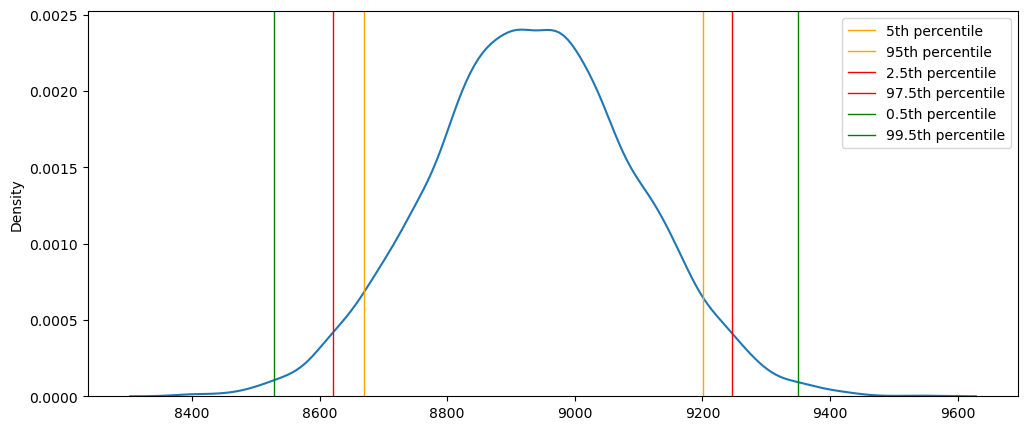

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(youth_purchase_mean)
plt.axvline(x=np.percentile(youth_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

# CI analysis for 18-25 age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
young_df=df.loc[df['Age']=='18-25']['Purchase']
young_df.mean()

9169.663606261289

In [ ]:
young_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(young_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    young_purchase_mean.append(bootstraped_mean)

#### Calculating CI at 90%,95% and 99% for sample of size 1000

In [ ]:
CI_young_90=np.percentile(young_purchase_mean,[5,95])
CI_young_95=np.percentile(young_purchase_mean,[2.5,97.5])
CI_young_99=np.percentile(young_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_young_90[0],2)} - {np.round(CI_young_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_young_95[0],2)} - {np.round(CI_young_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_young_99[0],2)} - {np.round(CI_young_99[1],2)}')

CI at 90% for sample of size 1000: 8908.77 - 9430.19
CI at 95% for sample of size 1000: 8860.39 - 9478.44
CI at 99% for sample of size 1000: 8760.69 - 9585.77


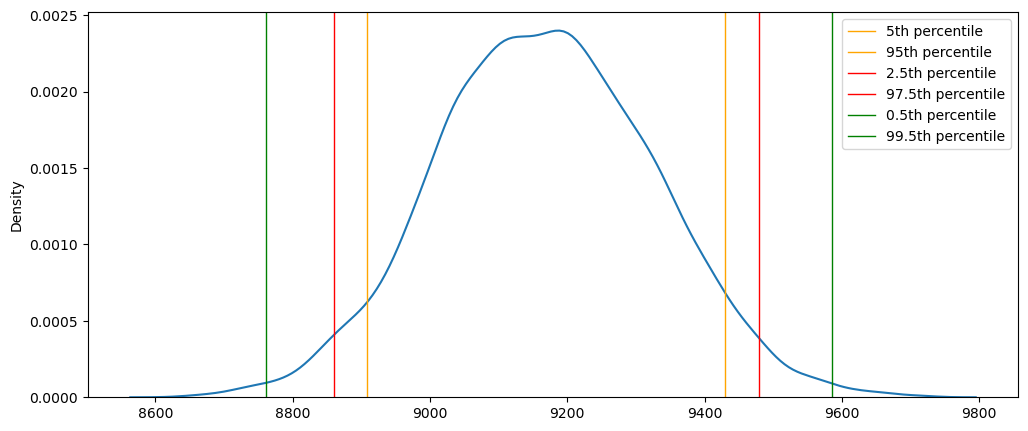

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(young_purchase_mean)
plt.axvline(x=np.percentile(young_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

#### CI analysis for 26-35 age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
adult_df=df.loc[df['Age']=='26-35']['Purchase']
adult_df.mean()

9252.690632869888

### Calculating CI at 90%,95% and 99% for samples of size 1000



In [ ]:
adult_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(adult_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    adult_purchase_mean.append(bootstraped_mean)

In [ ]:
CI_adult_90=np.percentile(adult_purchase_mean,[5,95])
CI_adult_95=np.percentile(adult_purchase_mean,[2.5,97.5])
CI_adult_99=np.percentile(adult_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_adult_90[0],2)} - {np.round(CI_adult_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_adult_95[0],2)} - {np.round(CI_adult_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_adult_99[0],2)} - {np.round(CI_adult_99[1],2)}')

CI at 90% for sample of size 1000: 8988.68 - 9510.19
CI at 95% for sample of size 1000: 8935.84 - 9562.95
CI at 99% for sample of size 1000: 8841.62 - 9662.14


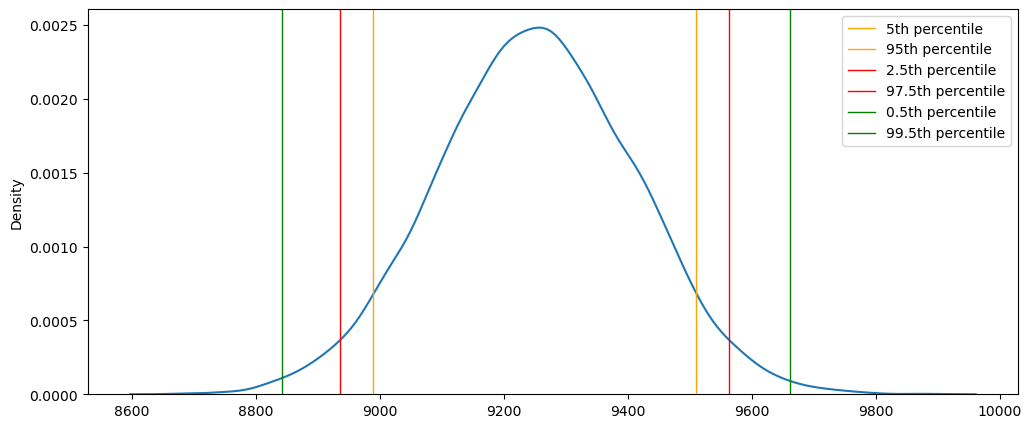

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(adult_purchase_mean)
plt.axvline(x=np.percentile(adult_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

## CI analysis for 36-45 age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
midage_df=df.loc[df['Age']=='36-45']['Purchase']
midage_df.mean()

9331.350694917874

In [ ]:
midage_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(midage_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    midage_purchase_mean.append(bootstraped_mean)

In [ ]:
CI_midage_90=np.percentile(midage_purchase_mean,[5,95])
CI_midage_95=np.percentile(midage_purchase_mean,[2.5,97.5])
CI_midage_99=np.percentile(midage_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_midage_90[0],2)} - {np.round(CI_midage_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_midage_95[0],2)} - {np.round(CI_midage_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_midage_99[0],2)} - {np.round(CI_midage_99[1],2)}')

CI at 90% for sample of size 1000: 9068.95 - 9594.51
CI at 95% for sample of size 1000: 9015.59 - 9641.51
CI at 99% for sample of size 1000: 8910.63 - 9750.66


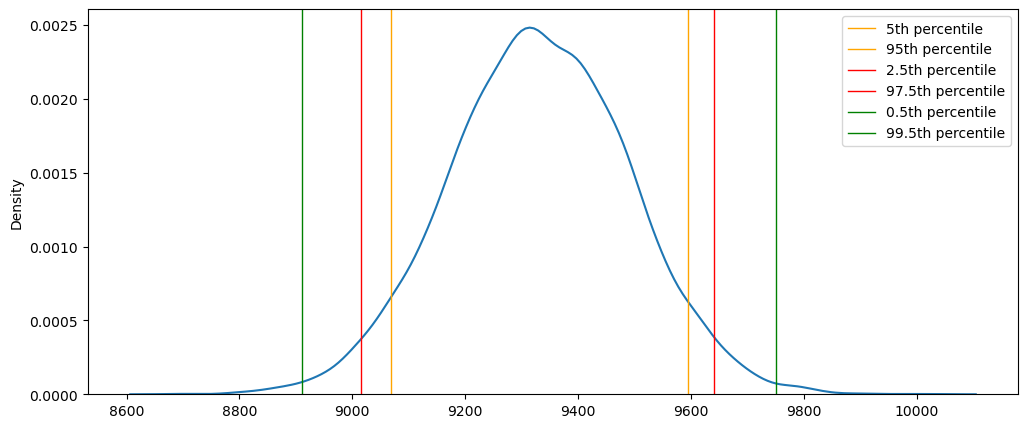

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(midage_purchase_mean)
plt.axvline(x=np.percentile(midage_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 46-50 Age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
midlife_df=df.loc[df['Age']=='46-50']['Purchase']
midlife_df.mean()

9208.625697468327

In [ ]:
midlife_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(midlife_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    midlife_purchase_mean.append(bootstraped_mean)

### Calculating CI at 90%,95% and 99% for samples of size 1000



In [ ]:
CI_midlife_90=np.percentile(midlife_purchase_mean,[5,95])
CI_midlife_95=np.percentile(midlife_purchase_mean,[2.5,97.5])
CI_midlife_99=np.percentile(midlife_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_midlife_90[0],2)} - {np.round(CI_midlife_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_midlife_95[0],2)} - {np.round(CI_midlife_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_midlife_99[0],2)} - {np.round(CI_midlife_99[1],2)}')

CI at 90% for sample of size 1000: 8949.25 - 9472.48
CI at 95% for sample of size 1000: 8899.58 - 9517.88
CI at 99% for sample of size 1000: 8802.95 - 9628.69


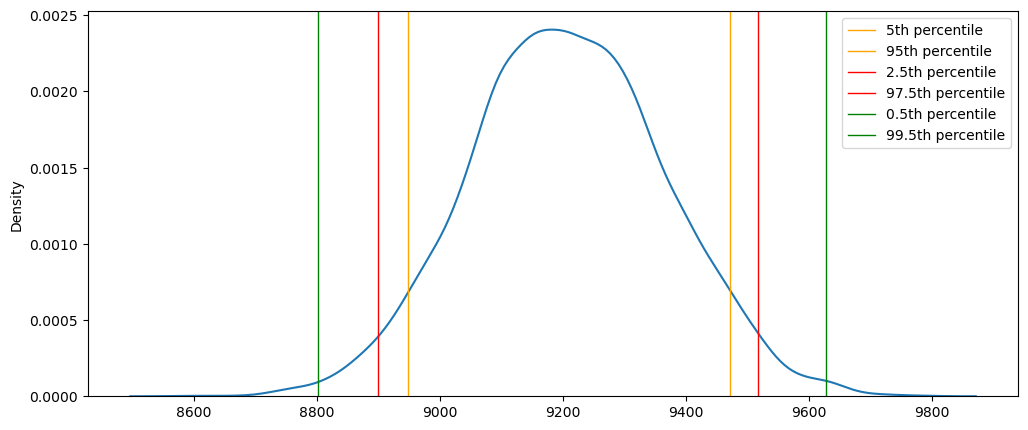

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(midlife_purchase_mean)
plt.axvline(x=np.percentile(midlife_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 51-55 age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
old_df=df.loc[df['Age']=='51-55']['Purchase']
old_df.mean()

9534.808030960236

In [ ]:
old_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(old_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    old_purchase_mean.append(bootstraped_mean)

### Calculating CI at 90%,95% and 99% for samples of size 1000



In [ ]:
CI_old_90=np.percentile(old_purchase_mean,[5,95])
CI_old_95=np.percentile(old_purchase_mean,[2.5,97.5])
CI_old_99=np.percentile(old_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_old_90[0],2)} - {np.round(CI_old_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_old_95[0],2)} - {np.round(CI_old_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_old_99[0],2)} - {np.round(CI_old_99[1],2)}')

CI at 90% for sample of size 1000: 9274.3 - 9803.7
CI at 95% for sample of size 1000: 9224.68 - 9856.66
CI at 99% for sample of size 1000: 9125.83 - 9970.16


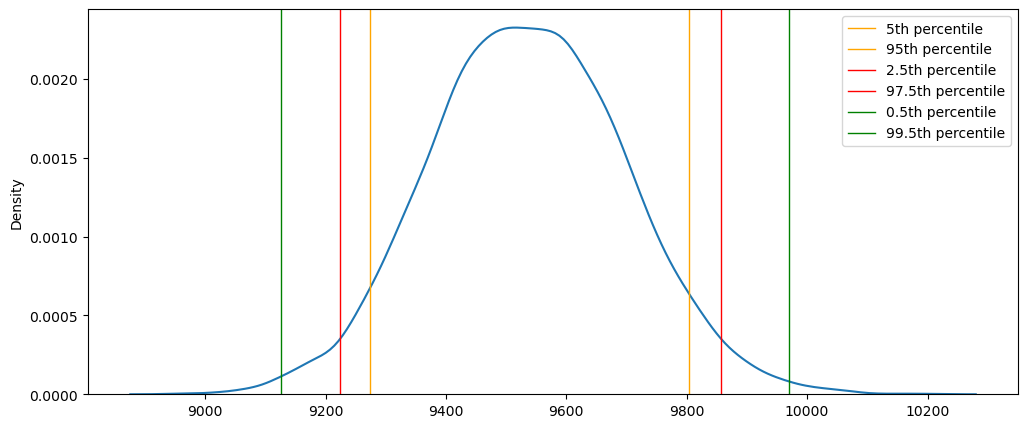

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(old_purchase_mean)
plt.axvline(x=np.percentile(old_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 55+ age-group
Creating a Samples of size 1000 and computing means through bootstraping

In [ ]:
senior_df=df.loc[df['Age']=='55+']['Purchase']
senior_df.mean()

9336.280459449405

In [ ]:
senior_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(senior_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    senior_purchase_mean.append(bootstraped_mean)

### Calculating CI at 90%,95% and 99% for samples of size 1000



In [ ]:
CI_senior_90=np.percentile(senior_purchase_mean,[5,95])
CI_senior_95=np.percentile(senior_purchase_mean,[2.5,97.5])
CI_senior_99=np.percentile(senior_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_senior_90[0],2)} - {np.round(CI_senior_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_senior_95[0],2)} - {np.round(CI_senior_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_senior_99[0],2)} - {np.round(CI_senior_99[1],2)}')

CI at 90% for sample of size 1000: 9070.68 - 9593.65
CI at 95% for sample of size 1000: 9017.65 - 9641.74
CI at 99% for sample of size 1000: 8929.9 - 9743.99


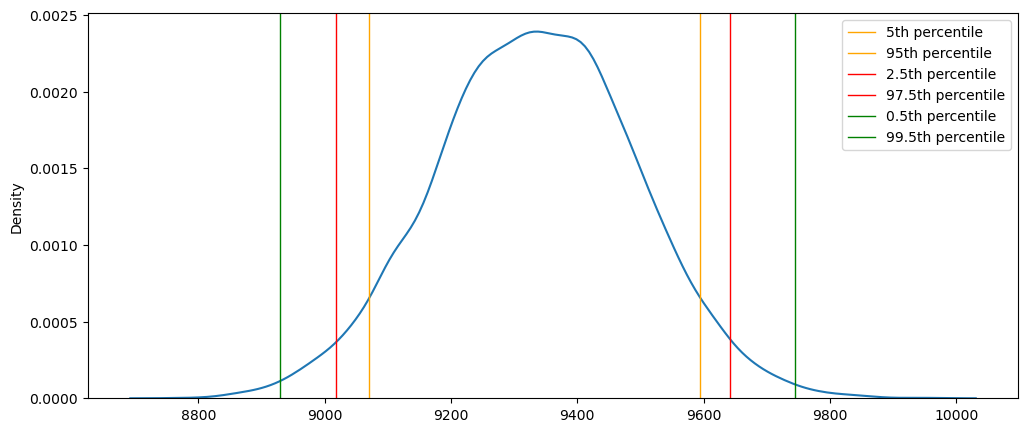

In [ ]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(senior_purchase_mean)
plt.axvline(x=np.percentile(senior_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### Conclusion


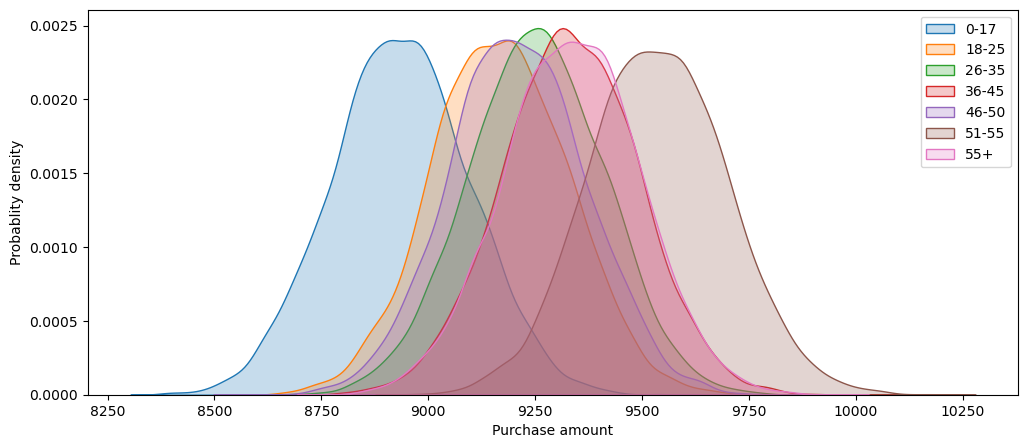

In [ ]:
sample_means=[youth_purchase_mean,young_purchase_mean,adult_purchase_mean,midage_purchase_mean,midlife_purchase_mean,old_purchase_mean,senior_purchase_mean]
labels=['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.figure(figsize=(12,5))
for i in range(len(labels)):
    sns.kdeplot(sample_means[i],fill=True,label=labels[i])
plt.xlabel('Purchase amount')
plt.ylabel('Probablity density')
plt.legend()
plt.show()

### Inference:
The majority of age groups' purchasing behaviors exhibit overlapping patterns, with the exception of the (0-17) and (51-55) age categories.

## Insights:
- At Walmart, 75.3% of transactions are attributed to male customers, while 24.7% of transactions are attributed to female customers.
- With 75.3% of transactions being initiated by male customers and 24.7% by female customers, the confidence interval for male purchases consistently exhibits both a higher upper bound and a wider spread in comparison to the confidence interval for female purchases. This statistical trend strongly implies that male customers tend to have a higher average transaction spending compared to their female counterparts.
- Inter Quartile Range for male customers :5863.0-12454.0
Median purchases for male customers: 8098.0
- Inter Quartile Range for female customer:5433.0-11400.0
- Median purchases for female customers: 7914.0
- CI for male customers at 95% for sample size of 1000: 9122.77 - 9750.98
- CI for female customers at 95% for sample size of 1000: 8437.86 - 9029.25
- Out of the total transactions, 59% are carried out by unmarried customers, while the remaining 41% are attributed to married customers.
- The confidence intervals for married and unmarried customers overlap, suggesting that both male and female customers spend a similar amount per transaction. This means that the spending behavior of married and unmarried customers is alike.
- The spending behavior of both married and unmarried customers is consistent, as they both spend nearly the same amount per transaction. This is notably evident from the boxplot analysis, where the interquartile range and median purchases for both groups remain identical.
- CI for married customers at 95% for sample size of 1000: 8956.45 - 9582.07
- CI for unmarried customers at 95% for sample size of 1000: 8951.62 - 9572.98
- Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.
- The majority of age groups' purchasing behaviors exhibit overlapping patterns, with the exception of the (0-17) and (51-55) age categories.
- Purchase distribution of customers exhibits positive skewness, with a pronounced tail extending towards the higher values on the right side.
- Among Walmart's customers, a notable 27.4% exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
- The majority of customers fall under Occupation category 4.
- Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
- The majority of customers reside in a single city for a duration of one year.
- Within Walmart, product categories 13, 19, and 20 record the lowest spending per transaction among customers.
- Among Walmart customers, product categories 6, 7, and 15 stand out as the most favored, evidenced by their higher spending per transaction.
- Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.
Female customers predominantly favor product category 5 for their purchases, while male customers show a preference for product category 1 in their shopping choices.
- Both unmarried and married customers at Walmart exhibit a shared preference for product category 5 when making their shopping choices.

## Recommendations
**Actionable Insight: With 75.3% of transactions being initiated by male customers and 24.7% by female customers, the confidence interval for male purchases consistently exhibits both a higher upper bound and a wider spread in comparison to the confidence interval for female purchases. This statistical trend strongly implies that male customers tend to have a higher average transaction spending compared to their female counterparts.**

## Recommendations:

- For Black Friday sales, make sure the store provides a wide selection of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products to household essentials and beyond.
- Actively seek feedback from female customers to understand their preferences, concerns, and suggestions. Use this feedback to make improvements and adjustments that cater to their needs.
- For Black Friday sales, introduce loyalty programs tailored to female customers, featuring exclusive perks like discounts, early access to sales, and unique rewards. This approach can enhance engagement and attract female shoppers.
- Enhance the online shopping experience for female customers. Ensure that the website is user-friendly, offers detailed product information, and provides convenient options for delivery and returns.
- Collaborate with brands or influencers that resonate with female customers. This can help expand Walmart's reach and attract new female customers.


Actionable Insight: Confidence intervals of average married and unmarried spending overlapping.

## Recommendations:

- The overlapping confidence intervals of average spending for married and unmarried customers indicate that both male and female customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
- Instead of allocating resources and time to differentiate between "Married" and "Unmarried" subcategories, Walmart could enhance efficiency by treating both categories as unified. This approach is likely to yield more effective results.


Actionable Insight:Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.

## Recommendations:

- Designate safe and fun play areas within the store where children can engage in age-appropriate activities. This can provide parents with a convenient shopping experience while keeping kids entertained.
- Create dedicated zones with comfortable seating and Wi-Fi for teenagers. This can become a place where they can socialize, study, or relax while their parents shop.
- Stock a wide range of products that appeal to kids and teenagers, including toys, clothes, books, electronics, and school supplies. Ensure that the products are both engaging and age-appropriate.
- Offer educational toys, craft kits, and learning materials that promote creativity and skill development among children.
- Introduce special discounts and offers exclusively for the 0-17 age group, encouraging both children and parents to choose Walmart for their shopping needs.